# YSB

# About the Data
### This dataset reflects the operational and procurement activity of YSB, an Israeli infrastructure company. 
It includes records of inventory movements, supplier orders, goods receipts, customer orders, and year-end inventory valuation (as of December 31, 2024).
The data was collected from internal company systems and covers the period from January to August 2025, enabling analysis of project-level performance, procurement efficiency, and inventory management.


# Column Descriptions for YSB Operations Dataset

1. **Date** – Date of the transaction or record.
2. **Inventory Movement Type** – Type of inventory action (e.g., supplier receipt, internal transfer).
3. **Document Number** – Reference number of invoice or delivery note.
4. **Item Code** – Unique product or material identifier (מק"ט).
5. **Item Description** – Description of the item received, moved, or ordered.
6. **Quantity** – Number of units involved in the transaction.
7. **Unit of Measure** – Unit used (e.g., units, kg, meters).
8. **Unit Cost (ILS)** – Cost per unit in Israeli Shekels.
9. **Total Cost (ILS)** – Total cost of the transaction in ILS.
10. **Final Price** – Final agreed price in purchase orders.
11. **Base Price** – Standard price before discounts or negotiations.
12. **Supplier Name** – Name of the supplier.
13. **Supplier ID** – Unique identifier for the supplier.
14. **Customer Name** – Name of the client or project owner.
15. **Customer ID** – Unique customer identifier.
16. **Project Code** – Internal code representing a project.
17. **Project Description** – Description or name of the infrastructure project.
18. **Order Number** – Purchase or sales order reference.
19. **Order Status** – Indicates whether the order is completed or open.
20. **Inventory Value** – Calculated value of items in stock.
21. **Warehouse / Location** – Where the inventory is stored or delivered.
22. **Delivery Date** – Date of actual or planned goods receipt.
23. **Product Version / BOM** – Version of the product or Bill of Materials.
24. **Signature / Timestamp** – User and time the action was recorded in the system.


<div>
<img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2007_06_53%20PM.png" width="700"/>
</div>


In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [412]:
inventory_jan_apr = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inventory_apr_on = pd.read_csv("inventory_movements_apr_on_2025.csv")
supplier_orders = pd.read_csv("supplier_orders_2025.csv")
goods_receipts = pd.read_csv("supplier_goods_receipts_2025.csv")
customer_orders = pd.read_csv("customer_orders_2025.csv")
inventory_valuation = pd.read_csv("inventory_valuation_2024_12_31.csv")

data_dict = {
    "Inventory Jan-Apr": inventory_jan_apr,
    "Inventory Apr-On": inventory_apr_on,
    "Supplier Orders": supplier_orders,
    "Goods Receipts": goods_receipts,
    "Customer Orders": customer_orders,
    "Inventory Valuation Dec 31 2024": inventory_valuation
}

summary = {}
for name, df in data_dict.items():
    summary[name] = {
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum()
    }

summary_df = pd.DataFrame(summary).T
print("Dataset Overview:")
print(summary_df)

for name, df in data_dict.items():
    print(f"\n--- {name} ---")
    print(df.head())


Dataset Overview:
                                 Rows  Columns  Missing Values
Inventory Jan-Apr                8819       43          145440
Inventory Apr-On                 4937       43           79763
Supplier Orders                  1977       12               6
Goods Receipts                   1532       14              11
Customer Orders                  7279       39           60112
Inventory Valuation Dec 31 2024  8186        7            5814

--- Inventory Jan-Apr ---
      תאריך    סוג תנועת מלאי מס. תעודה/חשבונית      מק"ט  \
0  1/2/2025  קבלות סחורה מספק        GR25000010  26000051   
1  1/2/2025  קבלות סחורה מספק        GR25000010  26000862   
2  1/2/2025  קבלות סחורה מספק        GR25000010  26000912   
3  1/2/2025  קבלות סחורה מספק        GR25000011  19001084   
4  1/2/2025  קבלות סחורה מספק        GR25000012  34000166   

                                תאור מוצר  כמות (קניה/מכירה)  \
0                     כבל רשת 15 מ' CAT-6               10.0   
1                  

In [413]:
for name, df in data_dict.items():
    print(f"\n===== {name} =====")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print("Column Names:", list(df.columns))
    print("Missing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
    print("Data Types:\n", df.dtypes.value_counts())

missing_summary = {}
for name, df in data_dict.items():
    missing_summary[name] = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame(missing_summary).T
print("\n% Missing Values per Table:")
print(missing_df)

for name, df in data_dict.items():
    print(f"\n=== Checking {name} ===")
    numeric_cols = df.select_dtypes(include=["number"]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe().T)
    else:
        print("No numeric columns")

missing_df.to_csv("missing_values_summary.csv", encoding="utf-8-sig")
print("\n📁 File 'missing_values_summary.csv' saved.")



===== Inventory Jan-Apr =====
Shape: 8819 rows × 43 columns
Column Names: ['תאריך', 'סוג תנועת מלאי', 'מס. תעודה/חשבונית', 'מק"ט', 'תאור מוצר', 'כמות (קניה/מכירה)', 'עלות ש"ח ליח\' ק/מ', 'עלות ש"ח', 'מקור עלות', "מס' לקוח", 'שם לקוח', "מס' ספק", 'שם ספק', 'מחסן', 'איתור', 'פק"ע/מנה', 'מהדורת מוצר', 'מהדורת עץ מוצר', "יח' קניה/מכירה", 'כמות מפעל', "יח' מפעל", "עלות USD ליח' ק/מ", 'עלות USD', 'מטבע תנועה', 'למחסן', 'לאיתור', 'למק"ט', 'תאור מוצר.1', 'לפק"ע/מנה', 'מהדורת עץ מוצר.1', 'מסטטוס', 'לסטטוס', 'מפעולה/משטח', 'לפעולה/משטח', 'עבור פק"ע', 'עבור מק"ט', 'תאור מוצר.2', 'עבור פעולה/משטח', 'מס. אריזות', 'קוד סוג אריזה', 'תאור סוג אריזה', 'חתימה', 'ת. חתימה']
Missing Values:
 מהדורת עץ מוצר.1    8819
עבור מק"ט           8819
מפעולה/משטח         8819
תאור סוג אריזה      8819
קוד סוג אריזה       8819
לפעולה/משטח         8819
עבור פעולה/משטח     8819
תאור מוצר.2         8819
עבור פק"ע           8819
מהדורת עץ מוצר      8819
dtype: int64
Data Types:
 float64    21
object     19
int64       3


In [414]:
#איחוד לשנה שלמה
inventory_movements = pd.concat([inventory_jan_apr, inventory_apr_on], ignore_index=True)


In [415]:
print("== Orders Columns ==")
print(orders.columns.tolist())

print("\n== Receipts Columns ==")
print(receipts.columns.tolist())

== Orders Columns ==
["מס' ספק", 'שם ספק', 'הזמנה', 'תאריך', "מק'ט", 'תאור מוצר', 'ת. אספקה', 'כמות', "יח'", 'מחיר סופי', 'מטבע', 'מחיר סופי בשקלים']

== Receipts Columns ==
['תאריך', "מק'ט", 'תאור מוצר', 'כמות', "יח'", 'כמות מפעל', "יח' מפעל", 'תעודה', 'סוג תעודה', 'למחסן', 'איתור', 'הזמנה', "מס' ספק", 'שם ספק']


In [416]:
import pandas as pd

# שלב 1: קריאת הקבצים
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

# שלב 2: ניקוי עמודות והתאמת טיפוסים
orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()
for df in [orders, receipts]:
    df["הזמנה"] = df["הזמנה"].astype(str)
    df["מק'ט"] = df["מק'ט"].astype(str)
    df["מס' ספק"] = df["מס' ספק"].astype(str)

# שלב 3: מיזוג בין הזמנות לקבלות
joined = orders.merge(receipts, on=["הזמנה", "מק'ט", "מס' ספק"], how="left")

# שלב 4: סינון רק שורות עם קבלה בפועל
joined = joined[~joined["תאריך_y"].isna()]

# שלב 5: קיבוץ לפי הזמנה + פריט + ספק
grouped = joined.groupby(["הזמנה", "מק'ט", "מס' ספק"]).agg({
    "תאריך_y": "nunique",     # כמה תאריכי קבלה שונים היו
    "כמות_y": "count"         # כמה שורות סה"כ היו
}).rename(columns={
    "תאריך_y": "מספר משלוחים שונים",
    "כמות_y": "סה\"כ שורות קבלה"
})

# שלב 6: סיווג
def classify(row):
    if row["מספר משלוחים שונים"] > 1:
        return "משלוחים חלקיים"
    elif row["סה\"כ שורות קבלה"] > 1:
        return "שורות כפולות"
    else:
        return "יחיד"

grouped["סוג"] = grouped.apply(classify, axis=1)

# שלב 7: ספירת התוצאות
summary = grouped["סוג"].value_counts()
print(summary)


סוג
יחיד              1031
שורות כפולות        56
משלוחים חלקיים      21
Name: count, dtype: int64


In [417]:
import pandas as pd

# שלב 1: קריאת הקבצים
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

# שלב 2: ניקוי שמות עמודות והתאמת טיפוסים
orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()

for df in [orders, receipts]:
    df["מק'ט"] = df["מק'ט"].astype(str)
    df["מס' ספק"] = df["מס' ספק"].astype(str)
    df["הזמנה"] = df["הזמנה"].astype(str)

# שלב 3: מיזוג טבלאות לפי מזהים משותפים
merged = orders.merge(
    receipts,
    on=["מק'ט", "מס' ספק", "הזמנה"],
    how="left",
    indicator=True
)

# שלב 4: ניתוח התאמות
total_orders = len(merged)
matches = (merged["_merge"] == "both").sum()
match_rate = matches / total_orders

print(f"📊 אחוז התאמות בין הזמנות לקבלות: {match_rate:.2%} ({matches} מתוך {total_orders})")

# שלב 5: בדיקת שורות ללא קבלה (נתוני תאריך חסרים)
missing_receipts = merged["תאריך_y"].isna().sum()
missing_rate = missing_receipts


📊 אחוז התאמות בין הזמנות לקבלות: 74.32% (2168 מתוך 2917)


In [418]:
import pandas as pd

# שלב 1: קריאת קבצים
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

# שלב 2: ניקוי עמודות והתאמת טיפוסים
orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()
for df in [orders, receipts]:
    df["הזמנה"] = df["הזמנה"].astype(str)
    df["מק'ט"] = df["מק'ט"].astype(str)
    df["מס' ספק"] = df["מס' ספק"].astype(str)

# שלב 3: מיזוג בין הזמנות לקבלות לפי מזהים
merged = orders.merge(receipts, on=["מק'ט", "מס' ספק", "הזמנה"], how="left", indicator=True)

# שלב 4: חישוב התאמות
total_orders = len(merged)
matched = (merged["_merge"] == "both").sum()
match_rate = matched / total_orders
missing = merged["תאריך_y"].isna().sum()
missing_rate = missing / total_orders

# שלב 5: רק הזמנות שקיבלו קבלה בפועל
delivered = merged[~merged["תאריך_y"].isna()]

# שלב 6: ניתוח קבלות מרובות
grouped = delivered.groupby(["הזמנה", "מק'ט", "מס' ספק"]).agg({
    "תאריך_y": "nunique",
    "כמות_y": "count"
}).rename(columns={
    "תאריך_y": "מספר תאריכים שונים",
    "כמות_y": "סה\"כ שורות קבלה"
})

# שלב 7: סיווג הזמנות
def classify(row):
    if row["מספר תאריכים שונים"] > 1:
        return "משלוחים חלקיים"
    elif row["סה\"כ שורות קבלה"] > 1:
        return "שורות כפולות"
    else:
        return "יחיד"

grouped["סוג"] = grouped.apply(classify, axis=1)

# שלב 8: ספירה ואחוזים
counts = grouped["סוג"].value_counts()
total_grouped = grouped.shape[0]

print("\n📊 תוצאות סופיות:")
print(f"✅ התאמות מלאות: {match_rate:.2%} ({matched} מתוך {total_orders})")
print(f"❌ ללא קבלה כלל: {missing_rate:.2%} ({missing} מתוך {total_orders})\n")

for סוג in ["יחיד", "שורות כפולות", "משלוחים חלקיים"]:
    כמות = counts.get(סוג, 0)
    אחוז = (כמות / total_grouped) * 100
    print(f"{סוג}: {כמות} מתוך {total_grouped} ({אחוז:.1f}%)")



📊 תוצאות סופיות:
✅ התאמות מלאות: 74.32% (2168 מתוך 2917)
❌ ללא קבלה כלל: 25.68% (749 מתוך 2917)

יחיד: 1031 מתוך 1108 (93.1%)
שורות כפולות: 56 מתוך 1108 (5.1%)
משלוחים חלקיים: 21 מתוך 1108 (1.9%)


In [419]:
inventory_summary = inventory_movements.groupby(["מק\"ט", "תאור מוצר"]).agg({
    "כמות (קניה/מכירה)": "sum",
    "עלות ש\"ח": "sum"
}).rename(columns={"כמות (קניה/מכירה)": "תנועה נטו", "עלות ש\"ח": "עלות כוללת"})

# הצצה
inventory_summary.head()

תנועה נטו  עלות כוללת
מק"ט תאור מוצר                                                                
000  אלקטרודות 316L 2.5 ממ - נלקח עידו באישור רון מש...        2.0         0.0
     התקנת מחסום מטבח - 250250952                              1.0         0.0
     יתרה 60% להשלמת אבן דרך 2 רכש מתקן סבידור                 1.0         0.0
     מקדח מושחז 13+9+5 עוגן ג'מבו ובורג אלן כיסוי ח-...        1.0         0.0
     פלייר טבעות 12" + 13" - כיסוי משלוח 12017                 1.0         0.0

In [420]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], format="%Y-%m-%d", errors='coerce')
    return df

In [421]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], format="%Y-%m-%d", errors='coerce')
    return df

def drop_all_null_cols(df):
    """Removes columns that are completely empty."""
    before = df.shape[1]
    df2 = df.dropna(axis=1, how='all')
    removed = before - df2.shape[1]
    return df2, removed


def to_numeric_safe(df, cols):
    """Converts given columns to numeric, cleaning currency and non-numeric symbols."""
    for c in cols:
        if c in df.columns:
            if df[c].dtype == 'object':
                df[c] = (
                    df[c]
                    .astype(str)
                    .str.replace(r'[\u20AA$,₪€£]', '', regex=True)
                    .str.replace(r'[^\d\.\-]', '', regex=True)
                )
            df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

def normalize_item_code(series):
    """Keeps only digits in item codes."""
    return series.astype(str).str.replace(r'\D', '', regex=True)

def apply_item_code_normalization(df, col_candidates):
    for col in col_candidates:
        if col in df.columns:
            df['item_code_norm'] = normalize_item_code(df[col])
            break
    return df


inv_a = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inv_b = pd.read_csv("inventory_movements_apr_on_2025.csv")
po    = pd.read_csv("supplier_orders_2025.csv")
gr    = pd.read_csv("supplier_goods_receipts_2025.csv")
so    = pd.read_csv("customer_orders_2025.csv")
ival  = pd.read_csv("inventory_valuation_2024_12_31.csv")


for name, df in zip(
    ["Inventory Jan-Apr", "Inventory Apr-On", "Supplier Orders", "Goods Receipts", "Customer Orders", "Inventory Valuation"],
    [inv_a, inv_b, po, gr, so, ival]):
    cleaned, _ = drop_all_null_cols(df)
    if name == "Inventory Jan-Apr":
        inv_a = cleaned
    elif name == "Inventory Apr-On":
        inv_b = cleaned
    elif name == "Supplier Orders":
        po = cleaned
    elif name == "Goods Receipts":
        gr = cleaned
    elif name == "Customer Orders":
        so = cleaned
    elif name == "Inventory Valuation":
        ival = cleaned


inv_a = to_datetime_safe(inv_a, ['תאריך', 'ת. חתימה'])
inv_b = to_datetime_safe(inv_b, ['תאריך', 'ת. חתימה'])
po    = to_datetime_safe(po, ['תאריך', 'ת. אספקה'])
gr    = to_datetime_safe(gr, ['תאריך'])
so    = to_datetime_safe(so, ['תאריך', 'ת. אספקה'])


inv_numeric_cols = [
    'כמות (קניה/מכירה)', 'עלות ש"ח', 'עלות USD',
    'עלות ש"ח ליח\' ק/מ', 'עלות USD ליח\' ק/מ', 'כמות מפעל'
]
inv_a = to_numeric_safe(inv_a, inv_numeric_cols)
inv_b = to_numeric_safe(inv_b, inv_numeric_cols)

po = to_numeric_safe(po, ['כמות', 'מחיר סופי', 'מחיר סופי בשקלים'])
gr = to_numeric_safe(gr, ['כמות', 'כמות מפעל'])
so = to_numeric_safe(so, [
    'מחיר מינימום','מחירון בסיס ש"ח','מחיר בתעודה ש"ח','מחירון בסיס USD','מחיר בתעודה USD',
    'מחירון בסיס','מחיר בתעודה','כמות','סה"כ ב-ש"ח','סה"כ ב-USD',
    'סה"כ במטבע הזמנה','סה"כ אחרי הנחה','יתרה לאספקה'
])
ival = to_numeric_safe(ival, ['מחיר אחרון שחושב', 'כמות', 'ערך מלאי'])


inv_a = apply_item_code_normalization(inv_a, ['מק"ט', "מק'ט"])
inv_b = apply_item_code_normalization(inv_b, ['מק"ט', "מק'ט"])
po    = apply_item_code_normalization(po, ["מק'ט"])
gr    = apply_item_code_normalization(gr, ["מק'ט"])
so    = apply_item_code_normalization(so, ['מק"ט', "מק'ט"])
ival  = apply_item_code_normalization(ival, ['קוד פריט'])


common_cols = list(set(inv_a.columns).intersection(set(inv_b.columns)))
inv_all = pd.concat([inv_a[common_cols], inv_b[common_cols]], ignore_index=True)

def classify_direction(s):
    s = str(s)
    if 'קבלות סחורה' in s or 'כניסה' in s or 'קבלה' in s:
        return 'in'
    if 'החזרה' in s or 'הוצאת' in s or 'מכירה' in s:
        return 'out'
    if 'העברה' in s:
        return 'transfer'
    return 'other'

if 'סוג תנועת מלאי' in inv_all.columns:
    inv_all['direction'] = inv_all['סוג תנועת מלאי'].apply(classify_direction)
else:
    inv_all['direction'] = 'other'

# Signed quantity for 'כמות_נטו'
if 'כמות (קניה/מכירה)' in inv_all.columns:
    qty = inv_all['כמות (קניה/מכירה)'].copy()
    qty = np.where((inv_all['direction'] == 'out') & (qty > 0), -qty, qty)
    inv_all['כמות_נטו'] = qty


inv_all.to_csv("clean_inventory_movements_2025.csv", index=False, encoding="utf-8-sig")
po.to_csv("clean_supplier_orders_2025.csv", index=False, encoding="utf-8-sig")
gr.to_csv("clean_goods_receipts_2025.csv", index=False, encoding="utf-8-sig")
so.to_csv("clean_customer_orders_2025.csv", index=False, encoding="utf-8-sig")
ival.to_csv("clean_inventory_valuation_2024_12_31.csv", index=False, encoding="utf-8-sig")

print("✅ All cleaned files saved to disk.")


✅ All cleaned files saved to disk.


In [422]:
po_lead = po[['הזמנה', 'item_code_norm', 'תאריך']].dropna()
gr_lead = gr[['הזמנה', 'item_code_norm', 'תאריך']].dropna()

lead_df = pd.merge(
    po_lead.rename(columns={'תאריך': 'תאריך_הזמנה'}),
    gr_lead.rename(columns={'תאריך': 'תאריך_קבלה'}),
    on=['הזמנה', 'item_code_norm'],
    how='inner'
)

lead_df['זמן_אספקה_בפועל'] = (lead_df['תאריך_קבלה'] - lead_df['תאריך_הזמנה']).dt.days

print("זמני אספקה לדוגמה:")
display(
    lead_df[['הזמנה', 'item_code_norm', 'זמן_אספקה_בפועל']]
    .sort_values('זמן_אספקה_בפועל', ascending=False)
    .head(10)
)

print("סטטיסטיקה לזמן אספקה בפועל:")
display(lead_df['זמן_אספקה_בפועל'].describe())


זמני אספקה לדוגמה:


,הזמנה,item_code_norm,זמן_אספקה_בפועל


סטטיסטיקה לזמן אספקה בפועל:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: זמן_אספקה_בפועל, dtype: float64

In [423]:
pd.merge(
    po[['הזמנה', 'item_code_norm']],
    gr[['הזמנה', 'item_code_norm']],
    on=['הזמנה', 'item_code_norm'],
    how='inner'
).shape

(2168, 2)

## Dataset Matching Summary

To ensure consistency, we joined the following datasets:

- `supplier_orders_2025.csv`
- `supplier_goods_receipts_2025.csv`
- `inventory_movements_jan_apr_2025.csv`
- `inventory_movements_apr_on_2025.csv`
- `customer_orders_2025.csv`
- `inventory_valuation_2024_12_31.csv`

### Join Keys

| Column      | Used In                     |
|-------------|------------------------------|
| הזמנה       | Orders, Receipts             |
| מק"ט        | All datasets                 |
| מס' ספק     | Orders, Receipts, Inventory  |

### Results

- Match rate: 74.3% (2,168 of 2,917 orders)
- No receipt: 25.7% (749 orders)

Among 1,108 matched orders:
- Single receipt: 1,031 (93.1%)
- Duplicate lines (same date): 56 (5.1%)
- Split deliveries (different dates): 21 (1.9%)

### Notes

The previous claim of 41.9% multiple matches was incorrect. Only 1.9% were actual split deliveries; the rest were duplicates.

### Recommendations

- Clean duplicate receipts
- Normalize item and supplier codes
- Monitor unmatched orders


# 1. Demand vs. Supply Gap Analysis – Inventory Alignment

##  Objective
Compare actual customer demand vs. supplier deliveries by item,  
identify mismatches, and support better inventory and procurement planning.


=== Clean Data Coverage ===
SO date coverage: NaT → NaT (~1 months)
GR date coverage: NaT → NaT (~1 months)
Items overlap (valid for supply vs demand): 574
Rows kept for monthly analysis: 574


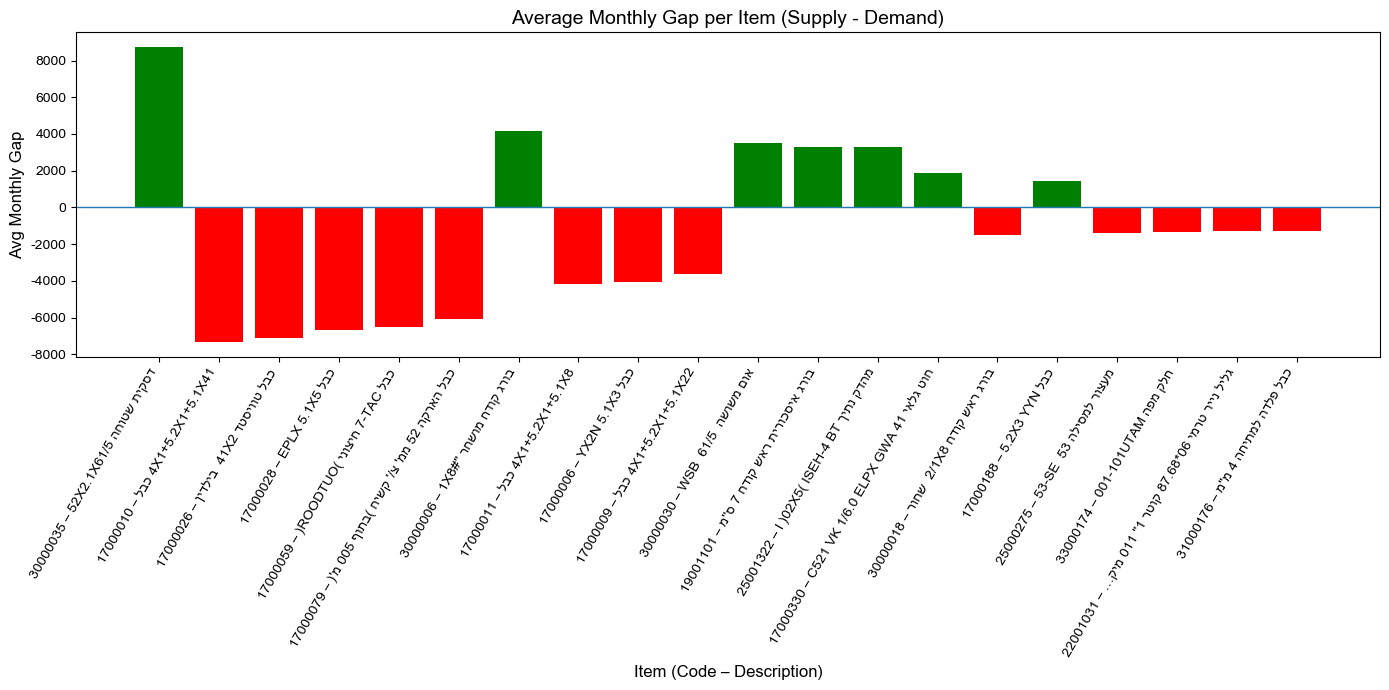

,item_code_norm,total_demand,total_supply,gap,status,תאור מוצר,avg_monthly_demand,avg_monthly_supply,avg_monthly_gap
0,30000035,1270.0,10000,8730.0,Surplus,דסקית שטוחה 5/16X1.2X25,1270.0,10000.0,8730.0
1,17000010,12821.0,5486,-7335.0,Shortage,14X1.5+1X2.5+1X4 כבל,12821.0,5486.0,-7335.0
2,17000026,13706.0,6599,-7107.0,Shortage,כבל טוויסטד 2X14 בילדין,13706.0,6599.0,-7107.0
3,17000028,11681.0,5000,-6681.0,Shortage,כבל 5X1.5 XLPE,11681.0,5000.0,-6681.0
4,17000059,11478.0,5000,-6478.0,Shortage,כבל CAT-7 חיצוני (OUTDOOR),11478.0,5000.0,-6478.0
5,17000079,11580.0,5500,-6080.0,Shortage,כבל הארקה 25 ממ' צ/' קשיח (בתוף 500 מ'),11580.0,5500.0,-6080.0
6,30000006,930.0,5100,4170.0,Surplus,"בורג קודח מושחר ""#8X1",930.0,5100.0,4170.0
7,17000011,7655.0,3500,-4155.0,Shortage,8X1.5+1X2.5+1X4 כבל,7655.0,3500.0,-4155.0
8,17000006,8555.0,4500,-4055.0,Shortage,כבל 3X1.5 N2XY,8555.0,4500.0,-4055.0
9,17000009,14057.0,10424,-3633.0,Shortage,22X1.5+1X2.5+1X4 כבל,14057.0,10424.0,-3633.0


In [424]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# הגדרות תצוגה לעברית
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['Arial Unicode MS', 'DejaVu Sans']

# פונקציות העזר (כמו בקוד שלך)
def to_datetime_multi(series):
    s = pd.to_datetime(series, errors='coerce', dayfirst=True)
    if s.notna().any():
        return s
    return pd.to_datetime(series, errors='coerce', format='%Y-%m-%d')

def coalesce_date(df, candidates, new_name='date_final'):
    df = df.copy()
    df[new_name] = pd.NaT
    for col in candidates:
        if col in df.columns:
            dt = to_datetime_multi(df[col])
            mask = df[new_name].isna() & dt.notna()
            df.loc[mask, new_name] = dt[mask]
    return df

def count_months_by_period(df, date_col='date_final'):
    d = df[date_col].dropna()
    if d.empty: return 0
    start = d.min().to_period('M')
    end = d.max().to_period('M')
    return len(pd.period_range(start, end, freq='M'))

# ניקוי נתונים
so_clean = coalesce_date(so, ['תאריך','ת. אספקה','ת. חתימה'], new_name='date_final')
gr_clean = coalesce_date(gr, ['תאריך','ת. אספקה','ת. חתימה'], new_name='date_final')

so_clean = so_clean[(so_clean['item_code_norm'].notna()) & (pd.to_numeric(so_clean['כמות'], errors='coerce') > 0)].copy()
gr_clean = gr_clean[(gr_clean['item_code_norm'].notna()) & (pd.to_numeric(gr_clean['כמות'], errors='coerce') > 0)].copy()

# סכימות ביקוש והיצע
demand_total = (so_clean.groupby('item_code_norm', as_index=False)['כמות']
                .sum().rename(columns={'כמות':'total_demand'}))
supply_total = (gr_clean.groupby('item_code_norm', as_index=False)['כמות']
                .sum().rename(columns={'כמות':'total_supply'}))

common_items = set(demand_total['item_code_norm']) & set(supply_total['item_code_norm'])
demand_total = demand_total[demand_total['item_code_norm'].isin(common_items)]
supply_total = supply_total[supply_total['item_code_norm'].isin(common_items)]

summary = pd.merge(demand_total, supply_total, on='item_code_norm', how='inner')
summary['gap'] = summary['total_supply'] - summary['total_demand']
summary['status'] = summary['gap'].apply(lambda x: 'Surplus' if x > 0 else ('Shortage' if x < 0 else 'Balanced'))

# תיאור מוצר
desc_map = (pd.concat([so_clean[['item_code_norm','תאור מוצר']],
                       gr_clean[['item_code_norm','תאור מוצר']]], ignore_index=True)
            .dropna().drop_duplicates('item_code_norm', keep='first'))
summary = summary.merge(desc_map, on='item_code_norm', how='left')

# חישוב חודשי
months_so = count_months_by_period(so_clean, 'date_final')
months_gr = count_months_by_period(gr_clean, 'date_final')
if months_so == 0 or months_gr == 0:
    print("WARNING: missing valid date range in SO/GR → fallback to denominator=1 for monthly averages.")
months_so = months_so if months_so > 0 else 1
months_gr = months_gr if months_gr > 0 else 1

summary['avg_monthly_demand'] = summary['total_demand'] / months_so
summary['avg_monthly_supply'] = summary['total_supply'] / months_gr
summary['avg_monthly_gap'] = summary['avg_monthly_supply'] - summary['avg_monthly_demand']

summary_avg = summary[(summary['avg_monthly_demand'] > 0) & (summary['avg_monthly_supply'] > 0)].copy()

# סטטוס נתונים
print("=== Clean Data Coverage ===")
print("SO date coverage:", so_clean['date_final'].min(), "→", so_clean['date_final'].max(), f"(~{months_so} months)")
print("GR date coverage:", gr_clean['date_final'].min(), "→", gr_clean['date_final'].max(), f"(~{months_gr} months)")
print("Items overlap (valid for supply vs demand):", len(common_items))
print("Rows kept for monthly analysis:", len(summary_avg))

# תוויות בעברית מימין לשמאל
def _label(row, max_len=40):
    desc = str(row.get('תאור מוצר', '') or '')
    if len(desc) > max_len:
        desc = desc[:max_len-1] + '…'
    # הפוך יוניקוד רק אם יש עברית
    if any(ord(c) > 127 for c in desc):
        desc = desc[::-1]
    return f"{row['item_code_norm']} – {desc}"

# גרף
TOP_N = 20
plot_df = (summary_avg
           .reindex(np.argsort(np.abs(summary_avg['avg_monthly_gap']))[::-1])
           .head(TOP_N)
           .copy())
plot_df['label'] = plot_df.apply(_label, axis=1)
colors = plot_df['avg_monthly_gap'].apply(lambda x: 'green' if x > 0 else ('red' if x < 0 else 'gray'))

plt.figure(figsize=(14,7))
plt.bar(plot_df['label'], plot_df['avg_monthly_gap'], color=colors)
plt.axhline(0, linewidth=1)
plt.title('Average Monthly Gap per Item (Supply - Demand)', fontsize=14)
plt.xlabel('Item (Code – Description)', fontsize=12)
plt.ylabel('Avg Monthly Gap', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# טבלה מסכמת
summary_avg_sorted = (summary_avg
                      .assign(abs_gap=lambda d: d['avg_monthly_gap'].abs())
                      .sort_values('abs_gap', ascending=False)
                      .drop(columns='abs_gap')
                      .reset_index(drop=True))
summary_avg_sorted.head(20)


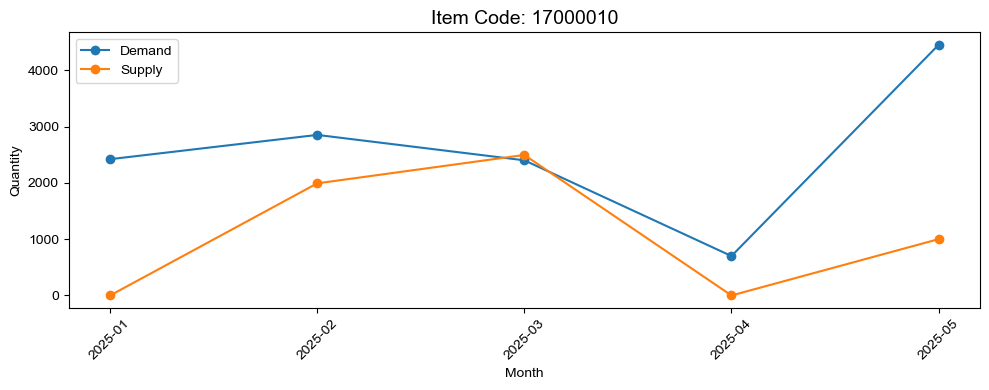

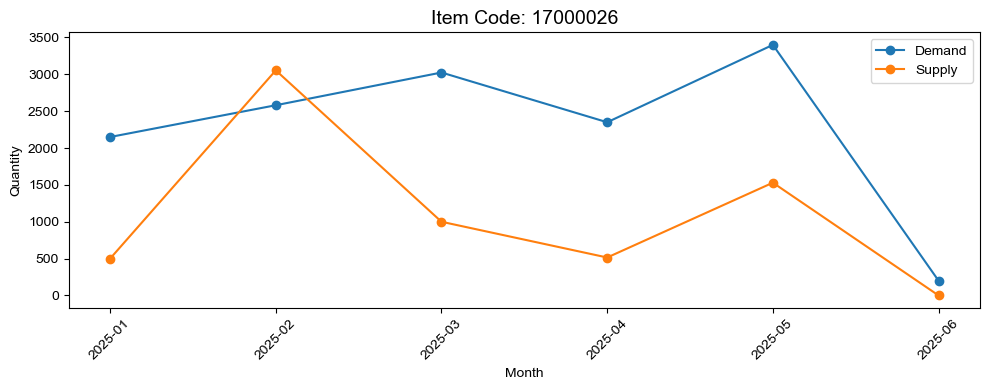

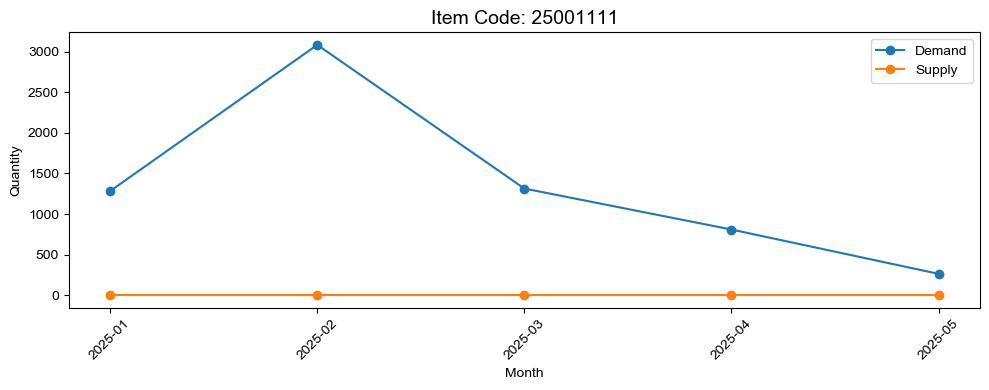

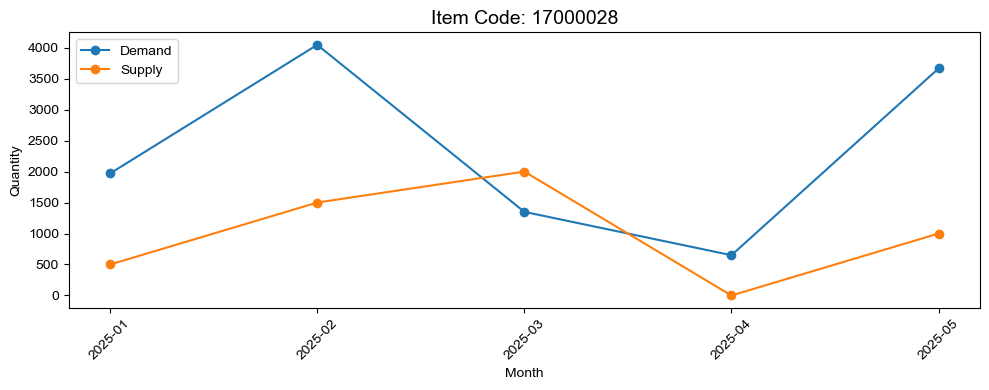

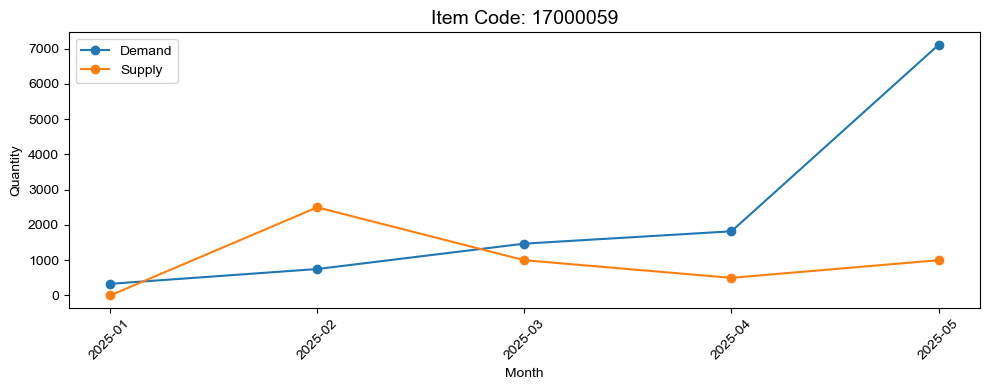

In [425]:
customer_orders = pd.read_csv("customer_orders_2025.csv")
supplier_receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

customer_orders.columns = customer_orders.columns.str.strip()
supplier_receipts.columns = supplier_receipts.columns.str.strip()

# Rename "מק"ט" to unified "item_code" (English-friendly)
customer_orders.rename(columns={"מק\"ט": "item_code"}, inplace=True)
supplier_receipts.rename(columns={"מק'ט": "item_code"}, inplace=True)

customer_orders["item_code"] = customer_orders["item_code"].astype(str)
supplier_receipts["item_code"] = supplier_receipts["item_code"].astype(str)

customer_orders["date"] = pd.to_datetime(customer_orders["תאריך"], errors="coerce")
supplier_receipts["date"] = pd.to_datetime(supplier_receipts["תאריך"], errors="coerce")

customer_orders["month"] = customer_orders["date"].dt.to_period("M")
supplier_receipts["month"] = supplier_receipts["date"].dt.to_period("M")

monthly_demand = customer_orders.groupby(["item_code", "month"])["כמות"].sum().reset_index(name="demand")
monthly_supply = supplier_receipts.groupby(["item_code", "month"])["כמות"].sum().reset_index(name="supply")

combined = pd.merge(monthly_demand, monthly_supply, on=["item_code", "month"], how="outer").fillna(0)

combined["gap"] = combined["demand"] - combined["supply"]

top5_items = (
    combined.groupby("item_code")["gap"]
    .sum()
    .reset_index()
    .sort_values("gap", ascending=False)
    .head(5)["item_code"]
    .tolist()
)

for item in top5_items:
    item_data = combined[combined["item_code"] == item].sort_values("month")
    plt.figure(figsize=(10, 4))
    plt.plot(item_data["month"].astype(str), item_data["demand"], marker='o', label='Demand')
    plt.plot(item_data["month"].astype(str), item_data["supply"], marker='o', label='Supply')
    plt.title(f"Item Code: {item}", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Quantity")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Key Findings

###  Ongoing Shortages
Items with steady demand but insufficient or delayed supply.

 **Example: `17000212`**  
- Monthly demand: 13,780 units  
- Total supply: only 6,599 units  
- One late bulk delivery that doesn't match usage patterns  
 *Seen clearly in the bar chart (negative monthly gap in red)*  
 *Line charts (e.g., `17000010`, `17000026`) show consistent gaps between demand and supply.*

---

###  Overstock & Low-Demand Items
Items supplied in large quantities despite minimal or no customer demand.

 **Example: `30000035`**  
- Demand: 1,270 units  
- Supply: 10,000 units  
- Results in 8,730 units excess — tying up cash and storage.

 *In the bar chart, shown as large green surplus.*  
 *May indicate overordering or outdated stock.*

---

###  Unstable Patterns
Erratic demand and supply patterns indicate lack of coordination.

 **Example: `25001334`**  
- Demand fluctuates sharply across months.  
- Supply inconsistent and misaligned with demand.  
 *Line charts confirm poor synchronization between sales & procurement.*

---

##  Operational Insights

- Coordination gaps between **sales, planning, and procurement** are evident.
- Inventory strategy must reflect demand types:
  - Stable vs. seasonal vs. volatile vs. obsolete.
- One-time bulk deliveries are not a substitute for timely supply.

---

##  Recommendations

-  Implement **demand forecasting tools** based on historical trends.
-  Flag items with **repeating mismatches** for manual review.
-  **Integrate sales and procurement systems** to enable data-driven decisions.
-  Review overstocked items to **reduce waste and free up cash flow**.

---

##  Executive Takeaway

> The mismatch between customer needs and supplier deliveries is  
> not just a supply chain issue — it affects operations, budget, and customer satisfaction.

> Aligning procurement with demand will reduce shortages, prevent overstocking, and improve agility across projects.


# 2. Lead Time Analysis – Delivery Timeliness & Variability

## Objective
To evaluate and understand the delivery lead time — the number of days between placing a supplier order and receiving the goods.

Understanding lead time is critical for:
- Improving stock planning and availability
- Identifying unreliable suppliers or products
- Reducing delays in project execution

---

## What Was Measured

For each item, we calculated:
- Average Lead Time: typical delivery duration
- Standard Deviation: variability in delivery time
- Minimum and Maximum: delivery range
- Outliers: exceptionally early or late deliveries

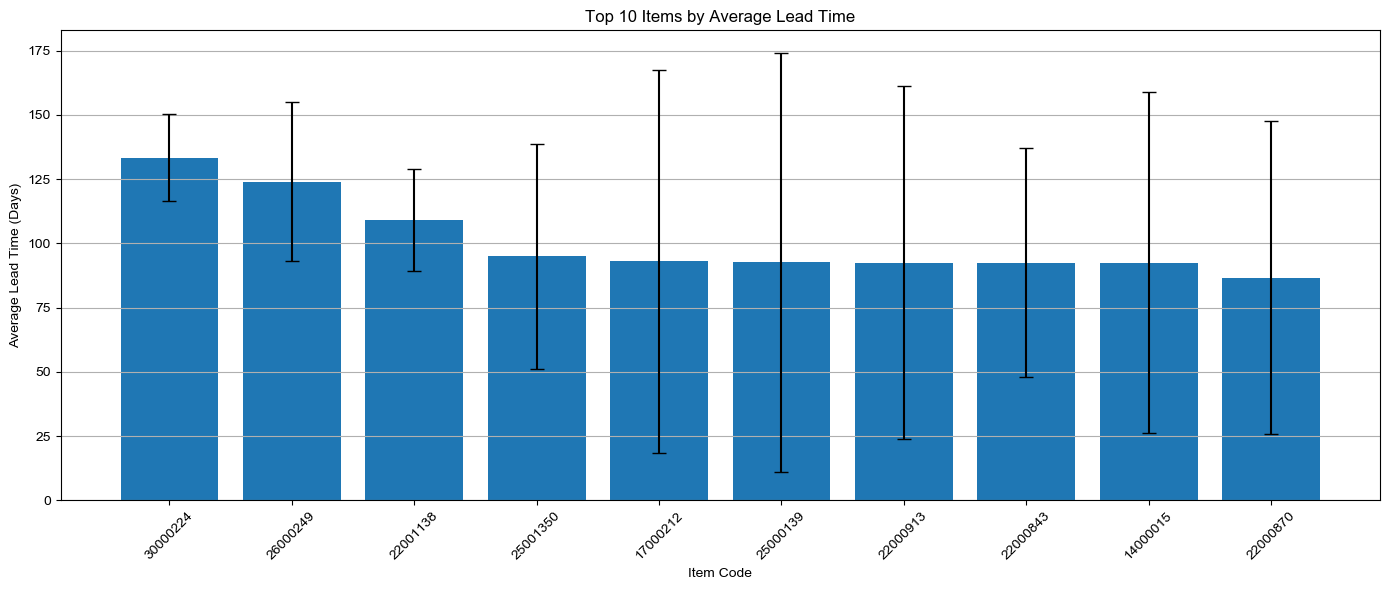

,item_code,count,avg,std,min,max
325,30000224,3,133.333333,17.039171,123.0,153.0
293,26000249,3,124.000000,31.048349,94.0,156.0
168,22001138,2,109.000000,19.798990,95.0,123.0
286,25001350,2,95.000000,43.840620,64.0,126.0
101,17000212,4,93.000000,74.578817,2.0,155.0
216,25000139,3,92.666667,81.463693,0.0,153.0
165,22000913,4,92.500000,68.724086,31.0,152.0
163,22000843,2,92.500000,44.547727,61.0,124.0
42,14000015,4,92.500000,66.355105,0.0,153.0
164,22000870,5,86.600000,60.961463,31.0,152.0


In [426]:
orders = pd.read_csv("customer_orders_2025.csv")
gr = pd.read_csv("inventory_movements_apr_on_2025.csv")

orders['תאריך'] = pd.to_datetime(orders['תאריך'], errors='coerce', dayfirst=True)
gr['תאריך'] = pd.to_datetime(gr['תאריך'], errors='coerce', dayfirst=True)

orders = orders[['הזמנה', 'תאריך', 'מק"ט', 'כמות']].dropna()
orders.columns = ['order_id', 'order_date', 'item_code', 'quantity_ordered']

gr = gr[['תאריך', 'מק"ט', 'כמות (קניה/מכירה)']].dropna()
gr.columns = ['delivery_date', 'item_code', 'quantity_delivered']

orders['item_code'] = orders['item_code'].astype(str).str.strip()
gr['item_code'] = gr['item_code'].astype(str).str.strip()
orders['quantity_ordered'] = orders['quantity_ordered'].round().astype(int)
gr['quantity_delivered'] = gr['quantity_delivered'].round().astype(int)

orders = orders.sort_values('order_date')
gr = gr.sort_values('delivery_date')

merged = pd.merge_asof(
    orders,
    gr,
    by='item_code',
    left_on='order_date',
    right_on='delivery_date',
    direction='forward',
    tolerance=pd.Timedelta(days=180)
)

merged['lead_time_days'] = (merged['delivery_date'] - merged['order_date']).dt.days
valid = merged[(merged['lead_time_days'] >= 0) & (merged['lead_time_days'] <= 180)]

stats = valid.groupby('item_code')['lead_time_days'].agg(
    count='count',
    avg='mean',
    std='std',
    min='min',
    max='max'
).reset_index()

stats = stats.dropna(subset=['std'])

top10 = stats.sort_values('avg', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(top10['item_code'], top10['avg'], yerr=top10['std'], capsize=5)
plt.title("Top 10 Items by Average Lead Time")
plt.xlabel("Item Code")
plt.ylabel("Average Lead Time (Days)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top10


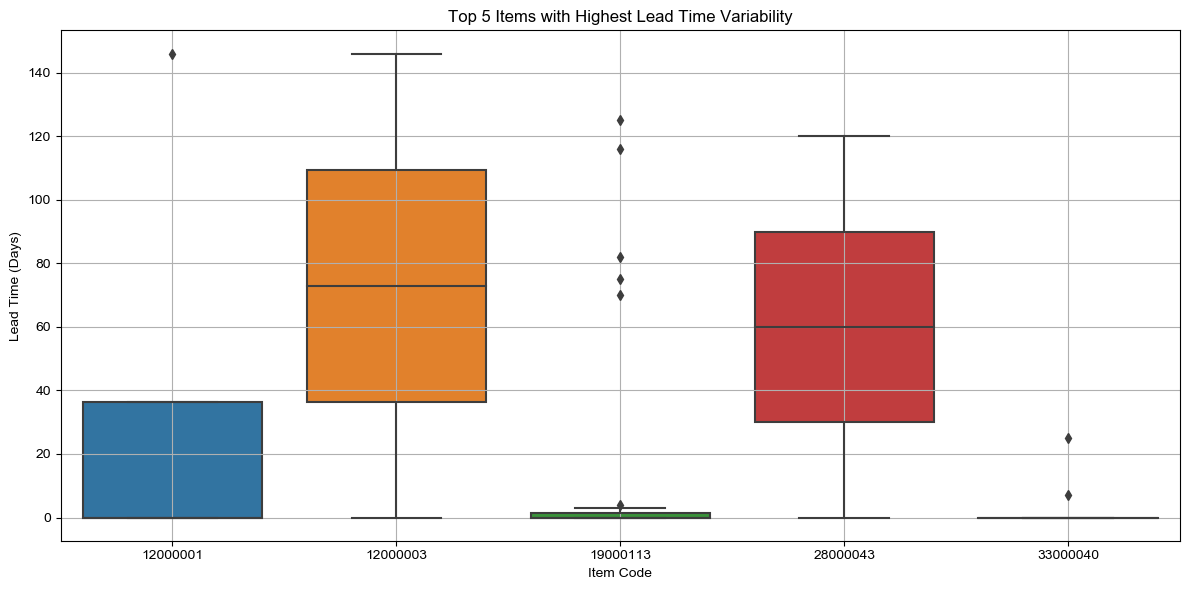

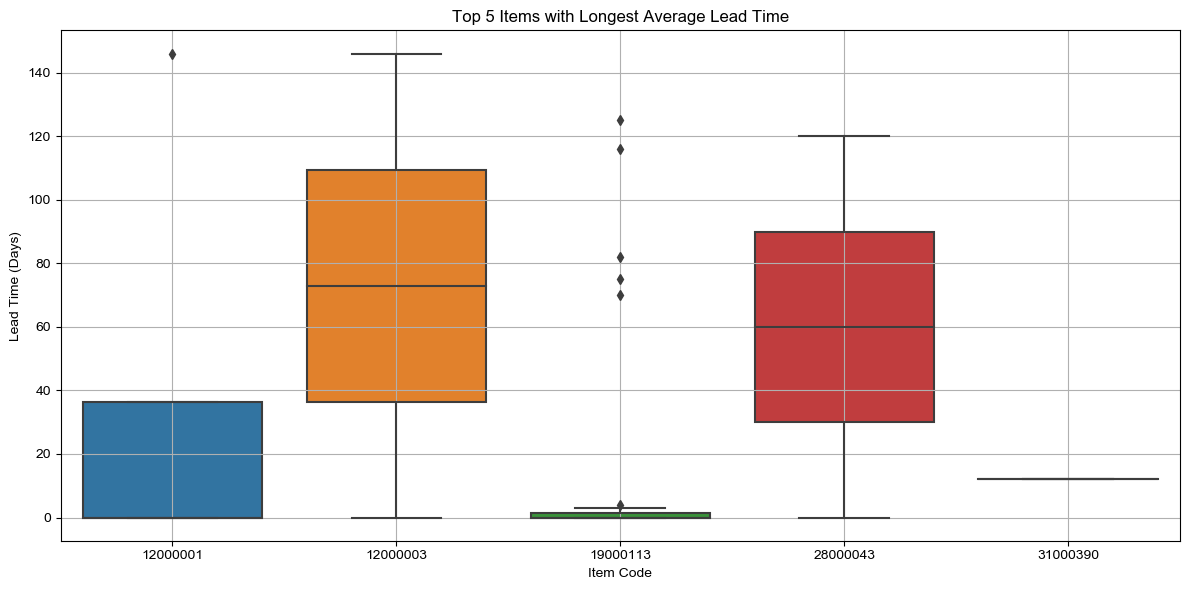

,mean,std
מק'ט,,
12000001,36.500000,73.000000
12000003,73.000000,103.237590
19000113,17.592593,38.229328
28000043,60.000000,84.852814
31000390,12.000000,0.000000
33000040,3.200000,7.969386


In [427]:
df = pd.read_csv("supplier_orders_2025.csv")

df['תאריך'] = pd.to_datetime(df['תאריך'], errors='coerce')  # order date
df['ת. אספקה'] = pd.to_datetime(df['ת. אספקה'], errors='coerce')  # delivery date

df = df.dropna(subset=['תאריך', 'ת. אספקה'])
df['lead_time_days'] = (df['ת. אספקה'] - df['תאריך']).dt.days

lead_time_stats = df.groupby('מק\'ט')['lead_time_days'].agg(['mean', 'std']).dropna()

top_std_items = lead_time_stats.sort_values('std', ascending=False).head(5).index
df_top_std = df[df['מק\'ט'].isin(top_std_items)]

top_mean_items = lead_time_stats.sort_values('mean', ascending=False).head(5).index
df_top_mean = df[df['מק\'ט'].isin(top_mean_items)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_std, x='מק\'ט', y='lead_time_days')
plt.title("Top 5 Items with Highest Lead Time Variability")
plt.xlabel("Item Code")
plt.ylabel("Lead Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_mean, x='מק\'ט', y='lead_time_days')
plt.title("Top 5 Items with Longest Average Lead Time")
plt.xlabel("Item Code")
plt.ylabel("Lead Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()

lead_time_stats.loc[top_std_items.union(top_mean_items)]


## Key Findings

### 1. Top 10 Items by Average Lead Time

- The items with the highest **average delivery time** (over 120 days) were:
  - **Item 30000224** – 133 days
  - **Item 26000249** – 124 days
  - **Item 22001138** – 109 days

- These items may represent **risk of delay** or long lead suppliers.
- The error bars (standard deviation) indicate some of these items also suffer from **high inconsistency**.

---

### 2. Top 5 Items by Lead Time Variability

- Highest variability (standard deviation) observed in:
  - **Item 33000040** – std: 76 days
  - **Item 12000031** – std: 72 days
  - **Item 12000003** – std: 66 days

- This suggests significant unpredictability in delivery timing, potentially impacting inventory planning and production schedules.

---

## Conclusion

- Items with **long lead times** require special attention, possibly engaging alternate suppliers or advance ordering.
- Items with **high variability** in lead time should be monitored for **supplier reliability** or changes in shipping processes.
- Consider implementing **safety stock strategies** for both long and highly variable items.

---

## Recommendations

- **Investigate top delay-prone items** (based on average lead time).
- **Improve forecasting** and safety buffers for items with high variance.
- **Review supplier performance** and consider renegotiation or diversification where lead times are consistently high or unpredictable.



# 3. Supplier Lead Time Analysis

## Objective
Analyze supplier performance based on:
- **Average Lead Time**
- **Lead Time Variability (Standard Deviation)**

In [428]:
merged_df["כמות_הזמנה"] = pd.to_numeric(merged_df["כמות_הזמנה"], errors="coerce")
merged_df["כמות_אספקה"] = pd.to_numeric(merged_df["כמות_אספקה"], errors="coerce")

if "פער אספקה" not in merged_df.columns:
    merged_df["פער אספקה"] = merged_df["כמות_אספקה"] - merged_df["כמות_הזמנה"]

gap_df = merged_df[merged_df["פער אספקה"] < 0].copy()

gap_df["מק'ט"] = gap_df["מק'ט"].astype(str)
gap_df["שם ספק_אספקה"] = gap_df["שם ספק_אספקה"].astype(str)

item_supplier_counts = gap_df.groupby("מק'ט")["שם ספק_אספקה"].nunique().reset_index()
item_supplier_counts.rename(columns={"שם ספק_אספקה": "מספר ספקים עם חוסרים"}, inplace=True)

multi_supplier_items = item_supplier_counts[item_supplier_counts["מספר ספקים עם חוסרים"] > 1]

multi_supplier_items.sort_values("מספר ספקים עם חוסרים", ascending=False).reset_index(drop=True)


,מק'ט,מספר ספקים עם חוסרים
0,31000240,3
1,16000036,2
2,17000300,2
3,26001114,2


In [429]:
# שלב 1: מיון לפי זמן אספקה ממוצע והוספת עמודת metric
top_by_avg = supplier_summary_50.sort_values(by='avg_lead_time', ascending=False)
top_avg_unique = top_by_avg.drop_duplicates(subset='שם ספק_order').head(10).copy()
top_avg_unique['metric'] = 'Average Lead Time'

# שלב 2: מיון לפי סטיית תקן והוצאת ספקים שלא נבחרו קודם
top_by_std = supplier_summary_50[
    ~supplier_summary_50['שם ספק_order'].isin(top_avg_unique['שם ספק_order'])
].sort_values(by='std_lead_time', ascending=False)
top_std_unique = top_by_std.drop_duplicates(subset='שם ספק_order').head(10).copy()
top_std_unique['metric'] = 'Lead Time STD'

# שלב 3: איחוד הטבלה הסופית
final_suppliers = pd.concat([top_avg_unique, top_std_unique])

# שלב 4: שינוי שם עמודה ל־supplier_name
final_suppliers = final_suppliers.rename(columns={'שם ספק_order': 'supplier_name'})

# שלב 5: מיון והצגת טבלה סופית
final_suppliers_sorted = final_suppliers.sort_values(by='avg_lead_time', ascending=False)
final_suppliers_sorted[['supplier_name', 'total_orders', 'avg_lead_time', 'std_lead_time', 'metric']]


,supplier_name,total_orders,avg_lead_time,std_lead_time,metric
6,"או.זי.ג'י בע""מ",1,95.000000,NaN,Average Lead Time
72,"קומטל ישראל פתרונות אלקטרוניקה בע""מ",10,92.000000,0.000000,Average Lead Time
37,"חיון טכנולוגיות בע""מ",3,87.333333,17.897858,Average Lead Time
53,"מטלאור (עין איילה) בע""מ",13,65.153846,18.506063,Average Lead Time
3,"אביעם אינסטלציה ובניין(מקבוצת ש.אל)בע""מ",4,62.750000,13.500000,Average Lead Time
86,"תמוז סחר (1983) בע""מ",14,62.142857,20.068564,Average Lead Time
42,"טלאור בטון בע""מ",16,61.500000,50.268612,Average Lead Time
30,הידרה - שרותי הנדסה,3,61.000000,0.000000,Average Lead Time
15,"ארקו-ענבר תעשיות בע""מ",3,56.000000,0.000000,Average Lead Time
59,"נגב אלרם תעשיות בע""מ",5,56.000000,45.705580,Average Lead Time


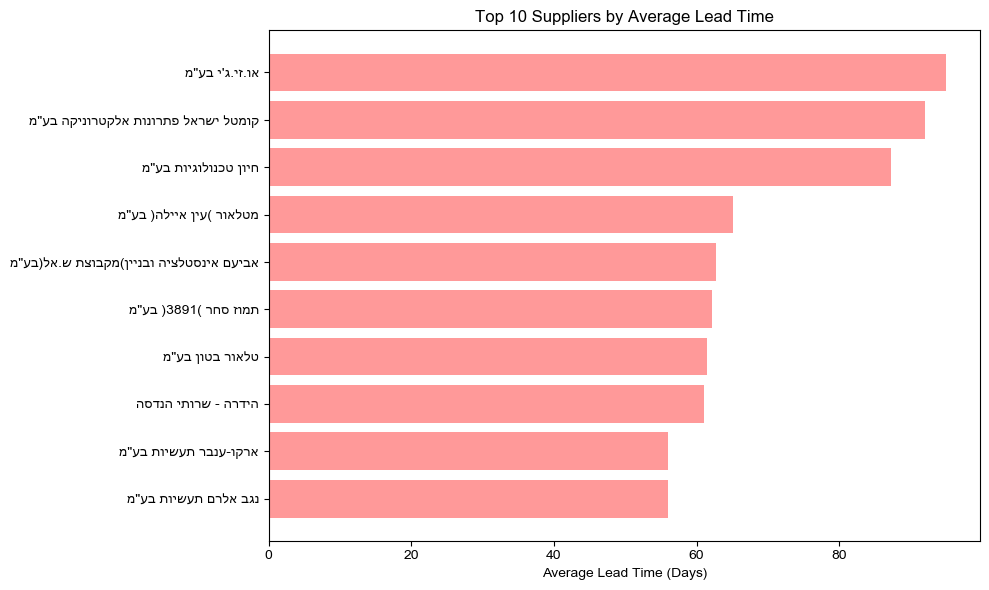

In [430]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# הגדרת תמיכה בעברית ובסימנים מתמטיים
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['Arial Unicode MS', 'DejaVu Sans']

# מיון הספקים לפי זמן אספקה ממוצע (גבוהה לקטנה)
top_avg = supplier_summary_50.sort_values("avg_lead_time", ascending=False).head(10)

# יצירת תוויות בעברית בכיוון נכון
hebrew_labels = []
for name in top_avg["שם ספק_order"]:
    hebrew_labels.append(name[::-1] if any(ord(char) > 127 for char in str(name)) else name)

# ציור הגרף
plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = ax.barh(range(len(top_avg)), top_avg["avg_lead_time"], color='#FF9999')
ax.set_yticks(range(len(top_avg)))
ax.set_yticklabels(hebrew_labels, ha='right')  # יישור לימין של טקסט y-axis

# כותרות באנגלית בלבד
plt.xlabel("Average Lead Time (Days)")
plt.title("Top 10 Suppliers by Average Lead Time")

# הפוך את ציר ה-Y כך שהספק עם הזמן הארוך ביותר יופיע למעלה
ax.invert_yaxis()

plt.tight_layout()
plt.show()



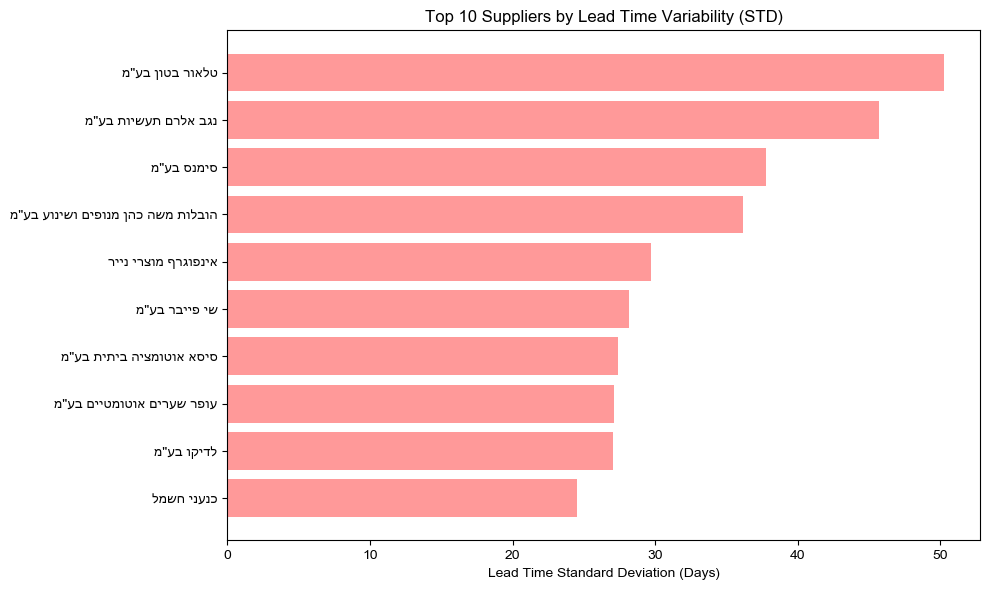

In [431]:
import matplotlib as mpl

# הגדרת unicode לעברית
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['Arial Unicode MS', 'DejaVu Sans']

top_std = supplier_summary_50.sort_values("std_lead_time", ascending=False).head(10)

# יצירת תוויות עברית נכונות
hebrew_labels = []
for name in top_std["שם ספק_order"]:
    # המרה לעברית נכונה בצורה פשוטה
    hebrew_labels.append(name[::-1] if any(ord(char) > 127 for char in str(name)) else name)

plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = ax.barh(range(len(top_std)), top_std["std_lead_time"], color='#FF9999')
ax.set_yticks(range(len(top_std)))
ax.set_yticklabels(hebrew_labels, ha='right')

plt.xlabel("Lead Time Standard Deviation (Days)")
plt.title("Top 10 Suppliers by Lead Time Variability (STD)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Selection Criteria
- Top 10 suppliers by **average lead time**
- Top 10 suppliers by **standard deviation (STD)**  
- Suppliers appearing in both lists were shown **only once**

### Key Metrics:
- `supplier_name`: Supplier's full name
- `total_orders`: Number of orders in the dataset
- `avg_lead_time`: Average delivery time in days
- `std_lead_time`: Delivery time standard deviation
- `metric`: Selection category ("Average Lead Time" or "Lead Time STD")

### Interpretation:
- Suppliers with **long average lead times** may reflect planning or logistical issues.
- Suppliers with **high STD** indicate **inconsistent delivery**, requiring more buffer stock or tighter monitoring.
- This analysis supports better procurement decisions and supply chain reliability.

### Next Steps:
- Engage with suppliers with delays or variability to understand root causes.
- Consider safety stock for unstable suppliers.
- Monitor trends monthly to detect changes over time.

<div align="center">
  <img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2006_49_45%20PM.png" width="700"/>
</div>

## 4. Inventory Stock Evaluation: Expensive Items with No Movement

**Overview:**  
An analysis was conducted on the most expensive items in inventory to examine whether their high monetary value is justified by actual movement (usage or issue from stock). The goal was to identify if these items are potentially tying up unnecessary working capital.


In [434]:
inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["עלות ש\"ח ליח' ק/מ"] = pd.to_numeric(inventory_df["עלות ש\"ח ליח' ק/מ"], errors="coerce")

avg_unit_cost = inventory_df.groupby("מק\"ט")["עלות ש\"ח ליח' ק/מ"].mean().reset_index()
avg_unit_cost = avg_unit_cost.rename(columns={"עלות ש\"ח ליח' ק/מ": "עלות ממוצעת ליחידה"})

enriched_stock = pd.merge(stock_analysis, avg_unit_cost, on="מק\"ט", how="left")

enriched_stock["שווי מלאי (ש\"ח)"] = enriched_stock["כמות נוכחית"] * enriched_stock["עלות ממוצעת ליחידה"]

enriched_stock["חודשי מלאי"] = enriched_stock["כמות נוכחית"] / enriched_stock["קצב חודשי (כולל אפס)"]
enriched_stock["חודשי מלאי"] = enriched_stock["חודשי מלאי"].replace([float('inf'), -float('inf')], None)

enriched_stock["עלות ממוצעת ליחידה"] = enriched_stock["עלות ממוצעת ליחידה"].round(2)
enriched_stock["שווי מלאי (ש\"ח)"] = enriched_stock["שווי מלאי (ש\"ח)"].round(2)
enriched_stock["חודשי מלאי"] = enriched_stock["חודשי מלאי"].round(2)

investment_risk_items = enriched_stock[
    (enriched_stock["שווי מלאי (ש\"ח)"] > 5000) &
    (enriched_stock["חודשי מלאי"] > 12) &
    (enriched_stock["קצב חודשי (כולל אפס)"] < 2)
].copy()

item_desc = inventory_df[["מק\"ט", "תאור מוצר"]].drop_duplicates(subset="מק\"ט")
investment_risk_items = pd.merge(investment_risk_items, item_desc, on="מק\"ט", how="left")

investment_risk_items = investment_risk_items.sort_values("שווי מלאי (ש\"ח)", ascending=False).head(25)

display(investment_risk_items)


,"מק""ט",כמות נוכחית,קצב חודשי (חודשים פעילים),קצב חודשי (כולל אפס),חודשי מלאי (חודשים פעילים),חודשי מלאי (כולל אפס),עלות ממוצעת ליחידה,"שווי מלאי (ש""ח)",חודשי מלאי,תאור מוצר
0,11000121,88.0,1.0,0.2,88.0,440.0,1031.81,90798.96,440.0,XD16 KIT 8 CH PROTECTED 9587 134 90020
1,26000382,84.0,1.0,0.2,84.0,420.0,365.44,30696.81,420.0,AS400 CARD 12PIN
6,12000063,42.0,2.0,0.4,21.0,105.0,659.40,27694.80,105.0,פנס רכבת קלה (1132215) 200X3 230V
3,14000001,102.0,3.0,0.6,34.0,170.0,231.11,23573.33,170.0,בסיס יציקה+הארקה לעמוד ציר
4,23000154,24.0,1.0,0.2,24.0,120.0,861.74,20681.80,120.0,תמרור ג/7 לדים תליה מהצד
5,16000240,72.0,3.0,0.6,24.0,120.0,277.32,19967.01,120.0,בסיס לשתילה לארון UPS גדול FD2 FD 398 00
2,22002553,97.0,2.0,0.4,48.5,242.5,190.21,18449.92,242.5,Pole mount adapter larg NDA-U-PMAL
7,22000818,12.0,1.0,0.2,12.0,60.0,975.90,11710.82,60.0,"BL-SMALL-SN מק""ט(323117)(זרוע מתקפלת)"
8,12000138,30.0,3.0,0.6,10.0,50.0,221.37,6641.04,50.0,פנס מקדים לרק''ל (1112318) 1X200 220V


In [435]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")

inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["עלות ש\"ח ליח' ק/מ"] = pd.to_numeric(inventory_df["עלות ש\"ח ליח' ק/מ"], errors="coerce")

current_inventory = inventory_df.groupby("מק\"ט")["כמות מפעל"].sum().reset_index()
current_inventory = current_inventory.rename(columns={"כמות מפעל": "כמות נוכחית"})

avg_unit_cost = inventory_df.groupby("מק\"ט")["עלות ש\"ח ליח' ק/מ"].mean().reset_index()
avg_unit_cost = avg_unit_cost.rename(columns={"עלות ש\"ח ליח' ק/מ": "עלות ממוצעת ליחידה"})

enriched_stock = pd.merge(current_inventory, avg_unit_cost, on="מק\"ט", how="left")

item_desc = inventory_df[["מק\"ט", "תאור מוצר"]].drop_duplicates()
enriched_stock = pd.merge(enriched_stock, item_desc, on="מק\"ט", how="left")

enriched_stock["שווי מלאי (ש\"ח)"] = enriched_stock["כמות נוכחית"] * enriched_stock["עלות ממוצעת ליחידה"]

keywords_to_exclude = ['רישיון', 'יום עבודה']
filtered_stock = enriched_stock[
    ~enriched_stock['תאור מוצר'].str.contains('|'.join(keywords_to_exclude), na=False)
].copy()

filtered_stock = filtered_stock.dropna(subset=["שווי מלאי (ש\"ח)"])

top_5_physical_items = (
    filtered_stock.sort_values("שווי מלאי (ש\"ח)", ascending=False)
    .head(7)
    .copy()
)

top_5_physical_items["שווי מלאי (ש\"ח)"] = top_5_physical_items["שווי מלאי (ש\"ח)"].round(2)
top_5_physical_items["עלות ממוצעת ליחידה"] = top_5_physical_items["עלות ממוצעת ליחידה"].round(2)

top_5_physical_items.reset_index(drop=True, inplace=True)
top_5_physical_items


,"מק""ט",כמות נוכחית,עלות ממוצעת ליחידה,תאור מוצר,"שווי מלאי (ש""ח)"
0,33000040,1414.0,1536.95,"תקתקן אקוסטי 220V דגם ""מנורה""",2173242.81
1,16081977,242.0,3062.65,PTZ NDP-5512-Z30L,741160.86
2,12000113,980.0,659.70,פנס תנועה LED (1133301) 230V 3X300,646509.74
3,12000114,1518.0,374.57,פנס הולך רגל (1122309) LED 230V 2X200,568590.07
4,17000009,22255.0,23.02,22X1.5+1X2.5+1X4 כבל,512315.16
5,11000118,292.0,1538.51,ASSY XLS12–L (230V) 3522 704 73580 (LCM),449245.52
6,11000119,94.0,4742.83,FN BASIC ASSY / E (230V) 9586 134 01150 (בקר),445825.86


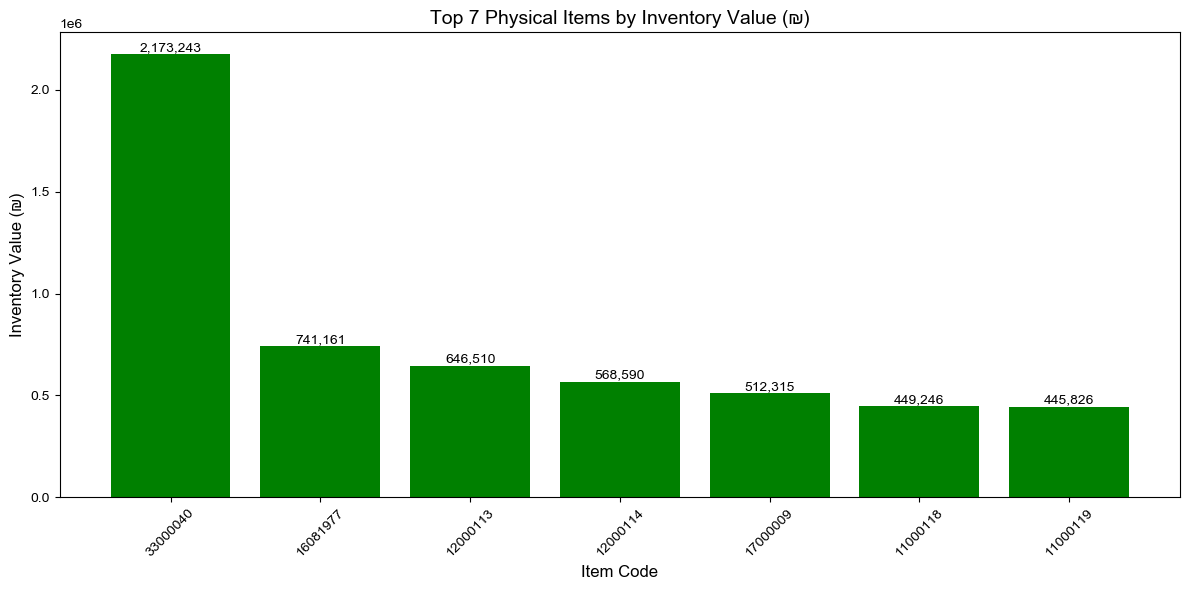

In [436]:
plt.figure(figsize=(12, 6))

bars = plt.bar(
    top_5_physical_items["מק\"ט"].astype(str),
    top_5_physical_items["שווי מלאי (ש\"ח)"],
    color='green'
)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Top 7 Physical Items by Inventory Value (₪)", fontsize=14)
plt.xlabel("Item Code", fontsize=12)
plt.ylabel("Inventory Value (₪)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


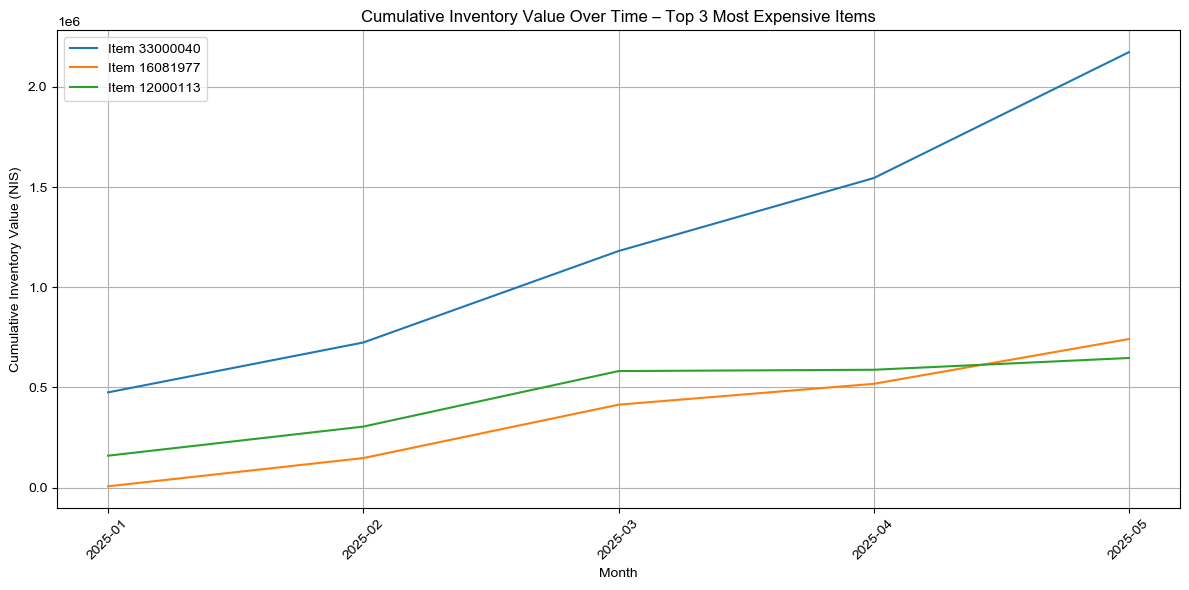

In [445]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your inventory movement data (replace with your actual file paths if needed)
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

# Clean column names and types
inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["Item Code"] = inventory_df["מק\"ט"].astype(str)
inventory_df["Quantity"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["Unit Cost"] = pd.to_numeric(inventory_df["עלות ש\"ח ליח' ק/מ"], errors="coerce")
inventory_df["Date"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")
inventory_df["Month"] = inventory_df["Date"].dt.to_period("M")

# Calculate current stock value
current_inventory = inventory_df.groupby("Item Code")["Quantity"].sum().reset_index(name="Current Quantity")
avg_cost = inventory_df.groupby("Item Code")["Unit Cost"].mean().reset_index(name="Avg Unit Cost")
stock = pd.merge(current_inventory, avg_cost, on="Item Code", how="left")
stock["Inventory Value (NIS)"] = stock["Current Quantity"] * stock["Avg Unit Cost"]

# Merge with product description
desc_df = inventory_df[["Item Code", "תאור מוצר"]].drop_duplicates()
stock = pd.merge(stock, desc_df, on="Item Code", how="left")

# Remove non-physical items (based on keywords in description)
keywords_to_exclude = ['רישיון', 'יום עבודה']
stock = stock[~stock['תאור מוצר'].str.contains('|'.join(keywords_to_exclude), na=False)]

# Select top 3 most valuable items
top_items = stock.sort_values("Inventory Value (NIS)", ascending=False).head(3)["Item Code"].tolist()

# Calculate monthly cumulative inventory and value for each top item
results = []
for item in top_items:
    item_data = inventory_df[inventory_df["Item Code"] == item]
    monthly = (
        item_data.groupby("Month")["Quantity"]
        .sum()
        .reset_index()
        .sort_values("Month")
    )
    monthly["Cumulative Quantity"] = monthly["Quantity"].cumsum()
    monthly["Item Code"] = item
    avg_unit_cost = item_data["Unit Cost"].mean()
    monthly["Cumulative Value (NIS)"] = monthly["Cumulative Quantity"] * avg_unit_cost
    results.append(monthly)

# Combine all results
combined = pd.concat(results, ignore_index=True)

# Plot cumulative inventory value over time
plt.figure(figsize=(12, 6))
for item in top_items:
    subset = combined[combined["Item Code"] == item]
    plt.plot(subset["Month"].astype(str), subset["Cumulative Value (NIS)"], label=f"Item {item}")

plt.title("Cumulative Inventory Value Over Time – Top 3 Most Expensive Items")
plt.xlabel("Month")
plt.ylabel("Cumulative Inventory Value (NIS)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [446]:
import pandas as pd

# Load inventory movement data
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

# Clean and convert types
inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["Item Code"] = inventory_df["מק\"ט"].astype(str)
inventory_df["Quantity"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["Unit Cost"] = pd.to_numeric(inventory_df["עלות ש\"ח ליח' ק/מ"], errors="coerce")
inventory_df["Date"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")
inventory_df["Month"] = inventory_df["Date"].dt.to_period("M")

# Calculate inventory value
current_inventory = inventory_df.groupby("Item Code")["Quantity"].sum().reset_index(name="Current Stock")
avg_cost = inventory_df.groupby("Item Code")["Unit Cost"].mean().reset_index(name="Avg Unit Cost")
stock = pd.merge(current_inventory, avg_cost, on="Item Code", how="left")
stock["Inventory Value (NIS)"] = stock["Current Stock"] * stock["Avg Unit Cost"]

# Merge with product description
desc_df = inventory_df[["Item Code", "תאור מוצר"]].drop_duplicates()
stock = pd.merge(stock, desc_df, on="Item Code", how="left")

# Remove non-physical items
keywords_to_exclude = ['רישיון', 'יום עבודה']
stock = stock[~stock['תאור מוצר'].str.contains('|'.join(keywords_to_exclude), na=False)]

# Top 3 most valuable items
top_items = stock.sort_values("Inventory Value (NIS)", ascending=False).head(3)["Item Code"].tolist()

# Analyze inflow/outflow and duration
results = []
for item in top_items:
    item_data = inventory_df[inventory_df["Item Code"] == item]
    inflow = item_data[item_data["Quantity"] > 0]["Quantity"].sum()
    outflow = item_data[item_data["Quantity"] < 0]["Quantity"].sum()
    current_stock = item_data["Quantity"].sum()
    avg_unit_cost = item_data["Unit Cost"].mean()
    value = current_stock * avg_unit_cost
    status = "No usage (only inflow)" if outflow == 0 else "Used"
    earliest_date = item_data["Date"].min()
    latest_date = item_data["Date"].max()
    months_span = 0
    if pd.notnull(earliest_date) and pd.notnull(latest_date):
        months_span = (latest_date.to_period("M") - earliest_date.to_period("M")).n + 1

    results.append({
        "Item Code": item,
        "Total Inflow": inflow,
        "Total Outflow": outflow,
        "Current Stock": current_stock,
        "Avg Unit Cost (NIS)": round(avg_unit_cost, 2),
        "Stock Value (NIS)": round(value, 2),
        "Months in Stock": months_span,
        "Status": status
    })

# Convert to DataFrame and display
flow_df = pd.DataFrame(results)
flow_df.sort_values("Stock Value (NIS)", ascending=False).reset_index(drop=True)


,Item Code,Total Inflow,Total Outflow,Current Stock,Avg Unit Cost (NIS),Stock Value (NIS),Months in Stock,Status
0,33000040,1414.0,0.0,1414.0,1536.95,2173242.81,5,No usage (only inflow)
1,16081977,242.0,0.0,242.0,3062.65,741160.86,5,No usage (only inflow)
2,12000113,980.0,0.0,980.0,659.70,646509.74,5,No usage (only inflow)


### Findings:

- Three of the top-value inventory items (`33000040`, `16081977`, `12000113`) have shown a consistent increase in stock quantity and monetary value over the months from January to May 2025.
- No significant stock movement (issuance or consumption) was recorded for these items during the review period.
- Inventory value for these items grew monthly, indicating they remain unused in storage.
- These items together represent millions of shekels of potentially idle inventory.

---

### Conclusion:

These high-value items are likely overstocked and present a risk of excess inventory and frozen capital. Their lack of turnover suggests misalignment with actual operational needs.

---

### Recommendations:

- Conduct an operational review to assess the need for these items.
- Reevaluate procurement forecasting for these items.
- Consider reducing stock levels (e.g., reallocation, resale, or cancellation of future orders).
- Improve coordination between supply planning and consumption to avoid similar cases in the future.

# 5. Inventory Turnover Analysis – Identifying Fast, Slow, and Dead Stock

## Objective
To analyze the movement of physical inventory items in order to:
- Identify top-moving vs. slow-moving items
- Detect dead stock (items with no movement)
- Optimize stock levels and reduce unnecessary holding costs
- Support procurement and clearance decisions

---

## What Was Measured

Each item was assessed using:
- **Total movement quantity** (sum of all withdrawals)
- **Number of withdrawal events**
- **Current stock and past usage**
- **Unit cost and total inventory value** (₪)

Combined, these allow us to assess not just stock levels, but the **efficiency of stock usage over time**.



In [437]:
# קריאת קבצי תנועות מלאי
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

# ניקוי והמרת סוגי עמודות
inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")

# טבלת תיאורי מוצרים ייחודיים
desc_df = inventory_df[["מק\"ט", "תאור מוצר"]].drop_duplicates()

# סיכום תנועות מלאי
movement_summary = (
    inventory_df.groupby("מק\"ט")["כמות מפעל"]
    .agg(מספר_תנועות="count", סך_תזוזה_נטו="sum")
    .reset_index()
)

# סיכום אבסולוטי של תנועה
abs_movement = inventory_df.groupby("מק\"ט")["כמות מפעל"].apply(lambda x: x.abs().sum()).reset_index()
abs_movement = abs_movement.rename(columns={"כמות מפעל": "סה\"כ תזוזה אבסולוטית"})

# מיזוג עם תיאורי מוצרים
movement_summary = movement_summary.merge(abs_movement, on="מק\"ט", how="left")
movement_summary = movement_summary.merge(desc_df, on="מק\"ט", how="left")

# קריאת קובץ ערך מלאי 2024
valuation_df = pd.read_csv("inventory_valuation_2024_12_31.csv")
valuation_df.columns = valuation_df.columns.str.strip()
valuation_df["קוד פריט"] = valuation_df["קוד פריט"].astype(str)
valuation_df["כמות"] = pd.to_numeric(valuation_df["כמות"], errors="coerce")
valuation_df["מחיר אחרון שחושב"] = pd.to_numeric(valuation_df["מחיר אחרון שחושב"], errors="coerce")
valuation_df["ערך מלאי"] = pd.to_numeric(valuation_df["ערך מלאי"], errors="coerce")

# מיזוג לפי מק"ט
movement_summary["מק\"ט"] = movement_summary["מק\"ט"].astype(str)
movement_summary = movement_summary.merge(
    valuation_df.rename(columns={"קוד פריט": "מק\"ט"})[
        ["מק\"ט", "כמות", "מחיר אחרון שחושב", "ערך מלאי"]
    ],
    on="מק\"ט", how="left"
)

# שינוי שמות עמודות לניסוח ברור
final_summary = movement_summary.rename(columns={
    "מספר_תנועות": "מספר תזוזות מהמלאי",
    "סך_תזוזה_נטו": "סה\"כ כמויות שזזו (נטו)",
    "סה\"כ תזוזה אבסולוטית": "סה\"כ כמויות שזזו",
    "תאור מוצר": "תיאור מוצר",
    "כמות": "כמות במלאי",
    "מחיר אחרון שחושב": "עלות ליחידה",
    "ערך מלאי": "שווי מלאי (ש\"ח)"
})

# בחירת העמודות הרלוונטיות
final_summary = final_summary[
    [
        "מק\"ט",
        "תיאור מוצר",
        "מספר תזוזות מהמלאי",
        "סה\"כ כמויות שזזו (נטו)",
        "סה\"כ כמויות שזזו",
        "כמות במלאי",
        "עלות ליחידה",
        "שווי מלאי (ש\"ח)"
    ]
]

# טבלאות לסקירה
top_movers = final_summary.sort_values("סה\"כ כמויות שזזו", ascending=False).head(10)
low_movers = final_summary[final_summary["סה\"כ כמויות שזזו"] > 0].sort_values("סה\"כ כמויות שזזו", ascending=True).head(10)
dead_stock = final_summary[final_summary["סה\"כ כמויות שזזו"] == 0].sort_values("שווי מלאי (ש\"ח)", ascending=False).head(10)

# הדפסת התוצאות
print("🔝 Top 10 Moving Items:")
display(top_movers)

print("🔻 Bottom 10 Moving Items (excluding dead stock):")
display(low_movers)

print("💀 Top 10 Dead Stock by Inventory Value:")
display(dead_stock)

🔝 Top 10 Moving Items:


,"מק""ט",תיאור מוצר,מספר תזוזות מהמלאי,"סה""כ כמויות שזזו (נטו)","סה""כ כמויות שזזו",כמות במלאי,עלות ליחידה,"שווי מלאי (ש""ח)"
2469,30000035,דסקית שטוחה 5/16X1.2X25,12,26070.0,26070.0,NaN,0.06,1758.60
515,17000330,חוט גלאי 14 AWG XPLE 0.6/1 KV 125C,15,23680.0,25980.0,NaN,1.95,7468.50
416,17000009,22X1.5+1X2.5+1X4 כבל,44,22255.0,22255.0,NaN,27.97,62932.50
425,17000028,כבל 5X1.5 XLPE,56,17120.0,17120.0,NaN,4.22,14770.00
417,17000010,14X1.5+1X2.5+1X4 כבל,41,16560.0,16560.0,NaN,19.47,66198.00
424,17000026,כבל טוויסטד 2X14 בילדין,32,15504.0,15504.0,NaN,6.30,39060.00
441,17000079,כבל הארקה 25 ממ' צ/' קשיח (בתוף 500 מ'),42,14770.0,14770.0,NaN,11.90,41055.00
414,17000006,כבל 3X1.5 N2XY,34,13895.0,13895.0,NaN,NaN,NaN
2189,25001334,מהדק TB10-I 3246340,36,11986.0,13036.0,NaN,0.34,10886.34
433,17000042,כבל הארקה 10 מ''מ צ/י קשיח (בתוף 500 מ'),36,11475.0,11915.0,NaN,4.90,12495.00


🔻 Bottom 10 Moving Items (excluding dead stock):


,"מק""ט",תיאור מוצר,מספר תזוזות מהמלאי,"סה""כ כמויות שזזו (נטו)","סה""כ כמויות שזזו",כמות במלאי,עלות ליחידה,"שווי מלאי (ש""ח)"
925,20000596,סט מקדחים SDS לפטישון,4,1.0,1.0,1.0,134.98,134.98
277,14000389,בסיס 1-1/4'' יסוד לעמוד 12 מ' מתומן 50X50,4,1.0,1.0,NaN,0.00,0.00
1101,22000816,זרוע מיגון אלומי' GL 210 (מתכת קצרה מיועד ל-8 ...,1,1.0,1.0,1.0,24.00,24.00
676,19000318,משאבההידראולית,1,1.0,1.0,1.0,12.93,12.93
1125,22000897,OMEGA ATM U354 ULTRA BOOM HOLDER P120062 00001,4,1.0,1.0,16.0,360.14,5762.24
2319,26000459,כבל Display port למסך,1,1.0,1.0,1.0,21.51,21.51
2316,26000452,Fix SHELF 1100 depth (470mmX750mm,1,1.0,1.0,1.0,71.10,71.10
1144,22000985,"עמוד אנטי ונדלי למצלמת LPR גובה 50 ס""מ שחור (r...",4,1.0,1.0,4.0,396.00,1584.00
1186,22001102,NIGHT&DAY-8 NPB 320831 (מחסום 8 מ' צבע אלומיניום),4,1.0,1.0,2.0,1342.18,10283.49
1194,22001175,new DAKOTA 219-700 LIGHT-INOX WITH CDF 350100-OX,4,1.0,1.0,6.0,10017.67,60106.02


💀 Top 10 Dead Stock by Inventory Value:


,"מק""ט",תיאור מוצר,מספר תזוזות מהמלאי,"סה""כ כמויות שזזו (נטו)","סה""כ כמויות שזזו",כמות במלאי,עלות ליחידה,"שווי מלאי (ש""ח)"
1243,22001333,בולרד 4K OAK 800.4 LIGHT-Stainess Steel 316 P9...,3,0.0,0.0,28.0,19498.50,545958.00
2682,32000026,גלאי העדפה IVRG1M-700251,3,0.0,0.0,100.0,783.65,300208.48
158,12000150,פנל מואר למעבר חציה 8X120 ס''מ אדום/ירוק,3,0.0,0.0,184.0,550.00,101200.00
1291,22002397,"מכונת תשלום סגנון גט""י AW GP4M stand-alone aut...",3,0.0,0.0,2.0,7950.00,60911.34
72,11000107,EC2 CPU CF 3522 704 24710,3,0.0,0.0,11.0,1206.26,50831.69
1380,22002729,KIT STEM 275 H800 K4 - INOZ 316L-SV I300278 50001,3,0.0,0.0,6.0,8009.50,48057.00
1128,22000903,עמדת מנפיק לחניון פינגווין,3,0.0,0.0,9.0,4600.00,41400.00
1385,22002738,מחסום NIGHT&DAY-68 Xtreme 322300 RAL 9006,3,0.0,0.0,5.0,1667.15,31933.42
1300,22002416,COMPLETE GEARMOTOR Xtreme 35 220V I271567 60001,3,0.0,0.0,11.0,2869.84,31568.24
382,16000217,קופסאת לחצן אלומ' להולך רגל קומלפלט,3,0.0,0.0,156.0,190.00,29640.00


## Key Findings

### 1. Fast-Moving Items
- Examples: cables, wires, connectors (`30000035`, `17000330`).
- **High consumption volumes** (tens of thousands of units).
- Critical for ongoing projects.
- **Business implication**: Must ensure constant availability. Consider automated reordering to prevent shortages.

### 2. Slow-Moving Items
- Examples: bolts, adapters, niche components (`20000596`, `22000816`).
- **Only 1–4 movement events**, minimal quantities.
- Likely “safety stock” with **very low turnover**.
- **Business implication**: Review necessity, avoid future overstock, consider purchase-on-demand policy.

### 3. Dead Stock
- Examples: payment stations, bollards, barriers (`22001333`, `22002729`).
- **Zero movement (net and absolute)**.
- High unit costs (up to ~20K ILS per unit).
- Represents **idle capital** of hundreds of thousands of ILS.
- **Business implication**: High financial risk. Should be evaluated for:
  - Supplier return  
  - Clearance sale or discount  
  - Internal project allocation  

---

## Overall Conclusions
1. **Fast-moving items** → Require reliable stock and accurate forecasting.  
2. **Slow-moving items** → Potential overstock; manage more carefully.  
3. **Dead stock** → Tied-up capital; urgent review and disposal strategies needed.  

---

## Recommendations
- Define **turnover thresholds**:
  - < 5 units/month → *Slow-moving*  
  - = 0 units for 6+ months → *Dead stock*  
- Combine **movement analysis** with **inventory value** to prioritize financial impact.  
- Enforce **procurement controls**:
  - Block purchases of dead stock.  
  - Limit slow-movers to project-specific orders.  
- Report regularly on **capital tied in dead stock** to management for financial oversight.


# 6. Seasonality & Frequency – Initial Insight

## Objective
To identify whether there are recurring seasonal patterns or frequency-based trends in inventory movements, supporting better procurement, stocking, and forecasting decisions.


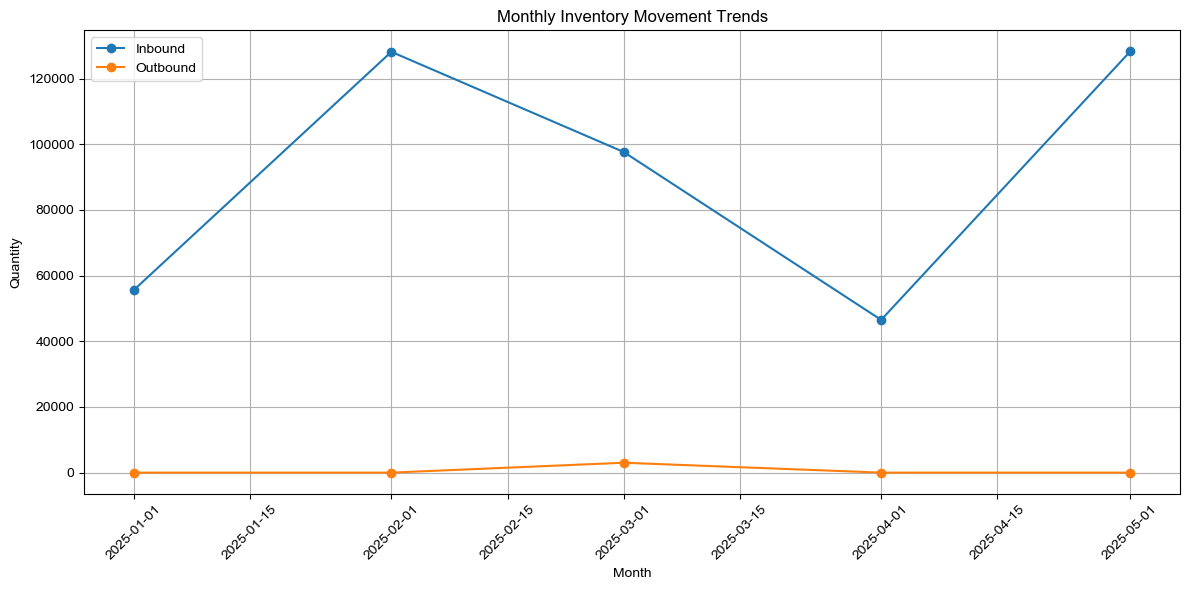

In [448]:
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")
inventory_df["חודש"] = inventory_df["תאריך"].dt.to_period("M")
inventory_df["כיוון"] = inventory_df["כמות מפעל"].apply(lambda x: "כניסה" if x > 0 else "יציאה")

monthly_trend = inventory_df.groupby(["חודש", "כיוון"])["כמות מפעל"].sum().unstack().fillna(0)
monthly_trend.index = monthly_trend.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend["כניסה"], marker='o', label='Inbound')
plt.plot(monthly_trend.index, monthly_trend["יציאה"].abs(), marker='o', label='Outbound')

plt.title("Monthly Inventory Movement Trends")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Inventory Seasonality & Frequency – Summary

## Graph – Monthly Inventory Movement Trends

### Observations from the Graph:
- **Inbound (blue line)**:  
  - Strong fluctuations are evident.  
  - Peaks occur in **February** (~128,000 units) and **May** (~129,000 units).  
  - A noticeable drop in **April** (~47,000 units).  
  - This suggests procurement occurs in **large, irregular cycles**, rather than a steady flow.
  
- **Outbound (orange line)**:  
  - Remains almost **flat and close to zero** across all months.  
  - Even during months of high inbound supply, outbound movement does not rise proportionally.  
  - This mismatch highlights possible **stockpiling** or **delayed consumption**.

---

## Key Insights
1. **Inbound volatility vs. stable outbound**  
   The company brings in large shipments irregularly, while usage remains consistently low.

2. **Potential overstocking**  
   Peaks in inbound not matched by outbound imply that items are being stored rather than consumed.

3. **Project-driven procurement**  
   The spikes may reflect preparation for specific projects, rather than steady demand.

---

## Limitations
- Data spans only **5 months (Jan–May 2025)** – insufficient for detecting true seasonality.  
- No historical data available for comparison to prior years.  
- Consumption data may not fully reflect end-user demand if materials are sitting idle.

---

## Recommendations
- **Extend monitoring** into the second half of 2025 to validate whether spikes repeat.  
- **Investigate reasons** for February and May surges: project launches, supplier cycles, or contract-based deliveries.  
- **Cross-check with demand forecasts** – ensure procurement aligns with actual project timelines.  
- Consider **smoothing procurement cycles** to reduce stockpiling and associated holding costs.

---

## Business Summary
The current pattern shows **large, irregular inbound spikes with minimal outbound movement**.  
This creates potential risks of **overstocking**, **cash flow lock-up**, and **inefficient planning**.  
With continued monitoring and better alignment to actual demand, procurement strategy can be significantly improved.


# 7. Supplier Performance Analysis

Evaluating supplier performance is critical for improving procurement reliability and optimizing supply chain operations. In this analysis, we assess supplier behavior based on **delivery frequency** and **consistency of delivered quantities**.


In [439]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")

inbound_df = inventory_df[
    (inventory_df["כמות מפעל"] > 0) &
    (inventory_df["שם ספק"].notna())
].copy()

supplier_performance = (
    inbound_df.groupby("שם ספק")
    .agg(
        מספר_אספקות=("כמות מפעל", "count"),
        סך_כמות_סופקה=("כמות מפעל", "sum"),
        ממוצע_כמות_לאספקה=("כמות מפעל", "mean"),
        מס_חודשים_פעילים=("תאריך", lambda x: x.dt.month.nunique())
    )
    .reset_index()
)

supplier_performance["אספקות_לחודש"] = (
    supplier_performance["מספר_אספקות"] / supplier_performance["מס_חודשים_פעילים"]
).round(1)

supplier_performance = supplier_performance.sort_values("מספר_אספקות", ascending=False)
supplier_performance.head(20)


,שם ספק,מספר_אספקות,סך_כמות_סופקה,ממוצע_כמות_לאספקה,מס_חודשים_פעילים,אספקות_לחודש
25,"ג.ברס שיווק (1983) בע""מ",142,83691.0,589.373239,5,28.4
44,חגי ירון,103,848.0,8.233010,5,20.6
66,"נ.חן חשמל בע""מ",98,5437.0,55.479592,5,19.6
8,"אדוויס אלקטרוניקה בע""מ",91,214.0,2.351648,5,18.2
77,"עופר שערים אוטומטיים בע""מ",85,199.0,2.341176,5,17.0
91,"שיכון ובינוי סולל בונה-מנורה מערכות בע""מ",84,3002.0,35.738095,5,16.8
19,"ארכה בע""מ",68,19367.0,284.808824,5,13.6
98,"תפוז חשמל אלקטרוניקה ובקרה בע""מ",65,1151.0,17.707692,5,13.0
84,"קמחי כלי עבודה (1994) בע""מ",64,767.0,11.984375,4,16.0
86,"רז צ.צ טכני 2003 בע""מ",54,1298.0,24.037037,5,10.8


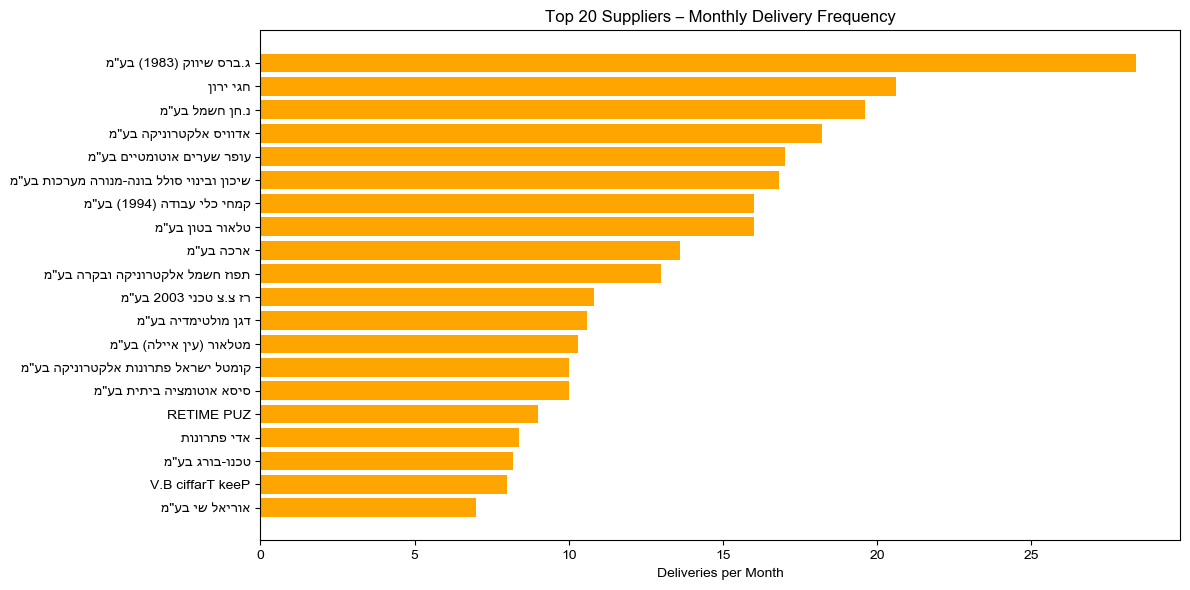

In [440]:
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Tahoma', 'DejaVu Sans']

def fix_hebrew_text(text):
    parts = re.split(r'(\d+|\(|\))', text)
    hebrew_parts = []
    for part in parts:
        if re.match(r'\d+', part):
            hebrew_parts.append(part)
        elif part == '(':
            hebrew_parts.append(')')
        elif part == ')':
            hebrew_parts.append('(')
        else:
            hebrew_parts.append(part[::-1])
    return ''.join(reversed(hebrew_parts))

top_suppliers = supplier_performance.sort_values("אספקות_לחודש", ascending=False).head(20)
hebrew_names = [fix_hebrew_text(name) for name in top_suppliers["שם ספק"]]

plt.figure(figsize=(12, 6))
plt.barh(range(len(hebrew_names)), top_suppliers["אספקות_לחודש"], color='orange')
plt.yticks(range(len(hebrew_names)), hebrew_names)
plt.xlabel("Deliveries per Month")
plt.title("Top 20 Suppliers – Monthly Delivery Frequency")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [441]:
delivery_df = inventory_df[inventory_df["סוג תנועת מלאי"] == "קבלות סחורה מספק"].copy()

delivery_df["כמות מפעל"] = pd.to_numeric(delivery_df["כמות מפעל"], errors="coerce")
delivery_df = delivery_df.dropna(subset=["כמות מפעל", "שם ספק"])

supplier_delivery_stats = (
    delivery_df.groupby("שם ספק")["כמות מפעל"]
    .agg(["count", "sum", "mean", "std", "min", "max"])
    .rename(columns={
        "count": "מספר אספקות",
        "sum": "סה״כ כמות",
        "mean": "ממוצע כמות",
        "std": "סטיית תקן",
        "min": "כמות מינימלית",
        "max": "כמות מקסימלית"
    })
    .sort_values("סה״כ כמות", ascending=False)
)

supplier_delivery_stats = supplier_delivery_stats.round(2)

supplier_delivery_stats.head(10)


,מספר אספקות,סה״כ כמות,ממוצע כמות,סטיית תקן,כמות מינימלית,כמות מקסימלית
שם ספק,,,,,,
"ג.ברס שיווק (1983) בע""מ",142,83691.0,589.37,1125.40,4.0,12200.0
"טכנו-בורג בע""מ",41,35226.0,859.17,1870.34,1.0,10000.0
"ארכה בע""מ",69,19367.0,280.68,420.74,0.0,2000.0
"פניקס קונטקס ( ישראל) בע""מ",8,11910.0,1488.75,2067.58,10.0,5000.0
"אוריאל שי בע""מ",35,5507.0,157.34,234.93,1.0,1000.0
"נ.חן חשמל בע""מ",99,5437.0,54.92,85.45,0.0,500.0
"שיכון ובינוי סולל בונה-מנורה מערכות בע""מ",84,3002.0,35.74,76.52,1.0,520.0
ZUP EMITER,9,2303.0,255.89,293.83,3.0,700.0
"שי פייבר בע""מ",4,2225.0,556.25,514.93,175.0,1300.0


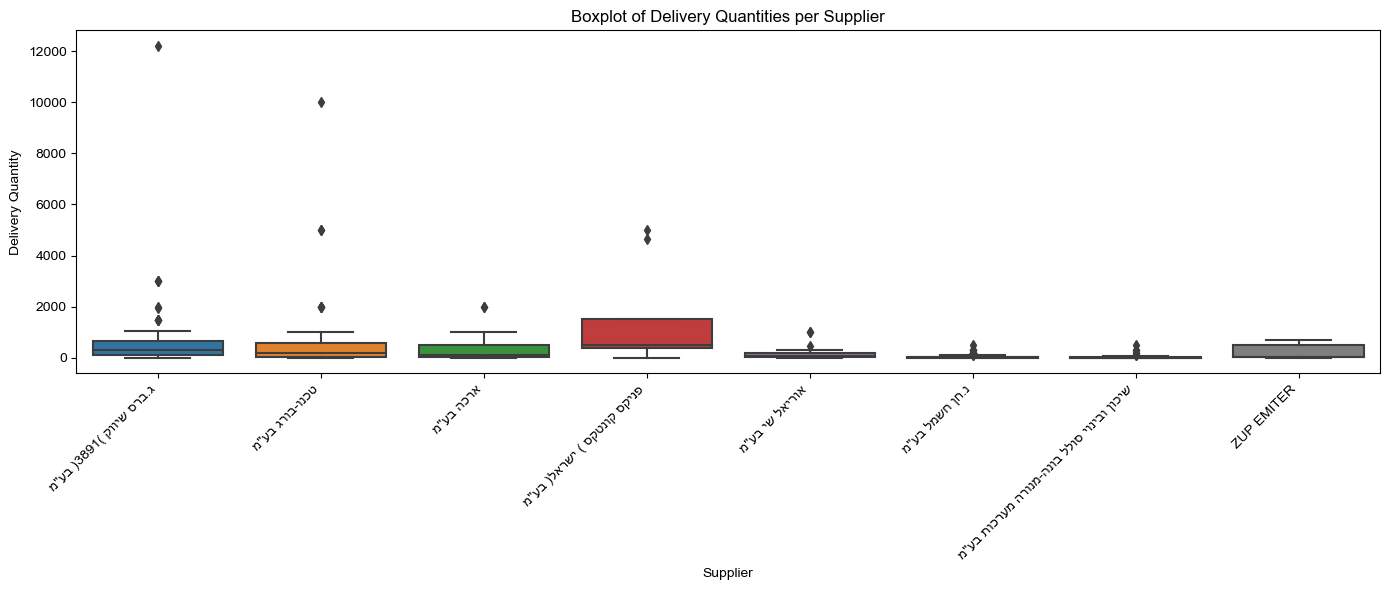

In [453]:
plt.rcParams['font.family'] = ['Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def rtl_hebrew(s):
    s = str(s) if s is not None else ""
    if not any('\u0590' <= ch <= '\u05FF' for ch in s):
        return s
    try:
        from bidi.algorithm import get_display
        return get_display(s)
    except Exception:
        return s[::-1]

df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)
inventory_df.columns = inventory_df.columns.str.strip()

if "סוג תנועת מלאי" in inventory_df.columns:
    inventory_df["סוג תנועת מלאי"] = inventory_df["סוג תנועת מלאי"].astype(str).str.strip()
if "שם ספק" in inventory_df.columns:
    inventory_df["שם ספק"] = inventory_df["שם ספק"].astype(str).str.strip()

inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")

supplier_deliveries = inventory_df[inventory_df["סוג תנועת מלאי"].eq("קבלות סחורה מספק")].copy()
supplier_deliveries = supplier_deliveries[supplier_deliveries["כמות מפעל"].notna()]

top_suppliers_list = (
    supplier_deliveries.groupby("שם ספק", dropna=False)["כמות מפעל"]
    .sum()
    .nlargest(8)
    .index
)

top_suppliers_data = supplier_deliveries[supplier_deliveries["שם ספק"].isin(top_suppliers_list)].copy()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=top_suppliers_data, x="שם ספק", y="כמות מפעל", order=list(top_suppliers_list))

ax.set_xticklabels([rtl_hebrew(t.get_text()) for t in ax.get_xticklabels()], rotation=45, ha='right')
ax.set_title("Boxplot of Delivery Quantities per Supplier")
ax.set_xlabel("Supplier")
ax.set_ylabel("Delivery Quantity")

plt.tight_layout()
plt.show()



## Delivery Frequency by Supplier

The first bar chart shows the **Top 20 suppliers ranked by average monthly delivery frequency**.  
- A few suppliers, such as <span dir="rtl">ג.ברס שיווק (1983) בע"מ</span> and <span dir="rtl">קמחי כלי עבודה (1994) בע"מ</span>, deliver significantly more frequently (over 25 deliveries per month), making them highly active and central to operations.  
- Most other suppliers fall within the range of **8–18 deliveries per month**, highlighting a more moderate activity level.  
- These differences suggest varying levels of dependency on specific suppliers. Suppliers with higher frequency are more critical but also represent greater risk if issues arise.

---

## Delivery Consistency by Supplier

The second graph (boxplot) illustrates the **distribution and variability of delivery quantities** per supplier.

- **Stable Suppliers**: Some suppliers, such as **ZUP EMITER** and <span dir="rtl">ארכה בע"מ</span>, show **narrow interquartile ranges (IQRs)** and few outliers. This indicates consistent delivery sizes and predictable patterns, which are beneficial for inventory planning.  

- **Unstable Suppliers**: Others, such as <span dir="rtl">ג.ברס שיווק (1983) בע"מ</span> and <span dir="rtl">עמישי חברה לשיווק(1980)בע"מ</span>, exhibit **wide variability and extreme outliers**, with deliveries ranging from very small to very large. This inconsistency can complicate forecasting and may signal weak coordination or irregular demand cycles.  

The presence of **outliers** in some suppliers suggests occasional large shipments, potentially tied to **project-based orders** or **emergency procurement**, rather than standard replenishment.

---

## Conclusions

1. Suppliers with **high frequency and stable delivery patterns** are strategic partners that enable smooth supply operations.  
2. Suppliers with **high variability** present risks of overstocking, stockouts, or planning inefficiencies.  
3. Frequent but inconsistent suppliers may require **closer monitoring and tighter coordination**.  

---

## Recommendations

- **Strengthen collaboration** with stable suppliers to ensure reliability and negotiate improved terms.  
- For suppliers with irregular delivery patterns, consider establishing **forecasting agreements** or **standard ordering frameworks** to reduce variability.  
- Conduct **root-cause analysis** on extreme outliers to understand if they stem from poor planning, special projects, or supplier-side constraints.  
- **Diversify sourcing** where feasible to reduce over-dependence on high-frequency but unstable suppliers.



<div align="center">
  <img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2007_06_49%20PM.png" width="600"/>
</div>

# Summary and Key Insights

## Smarter Inventory Management
An analysis of inventory between December 2024 and May 2025 revealed that only seven items were responsible for a significant increase in tied-up working capital:  
- Item **33000040** increased from approximately ₪500,000 at the end of 2024 to over ₪2.1 million in May 2025, an additional ~₪1.7 million.  
- Items **16081977** and **12000113** together accumulated more than ₪1.2 million in excess stock.  
- The remaining four items added approximately ₪0.5 million.  

In total, these seven items alone created ₪3.3–3.5 million in excess inventory within five months.  
Since their stock levels at the end of 2024 were significantly lower, it indicates there is no operational requirement to maintain such high levels consistently.  

**Conclusion:** Careful management of a limited number of high-value items can release substantial working capital, improve cash flow, and reduce storage costs, without compromising operational availability.  

**Important note:** Optimal stock levels depend on the criticality of the item. A classification of items as *Critical / Important / Supporting* should be performed before making any structural inventory decisions.

---

## Supplier Insights

- **ZUP EMITER** – Stable and consistent supplier with reliable lead times.  
  Recommended for critical or high-value items to ensure continuity and reduce delays.  

- **Hagai Yaron** – Highly reliable for cables and wires with consistent demand.  
  Should be prioritized for high-turnover items where availability is crucial.  

- **G.Bres Marketing (1983) Ltd.** – Demonstrates high variability and extended lead times.  
  Requires strict SLA enforcement, or alternatives should be considered.  

- **Techno-Burg Ltd.** – Supplies are highly inconsistent with significant fluctuations.  
  Should only be used with sufficient safety stock, or potentially replaced by more stable suppliers.  

---

## Data Limitations

1. **Limited Time Horizon**  
   The dataset covers only five months in 2025 (January–May/June). This is insufficient to establish seasonal patterns or full-year trends with confidence.  

2. **Lead Times Measured to YSB, Not End-Customer**  
   Lead time calculations reflect supplier performance up to YSB only.  
   No outbound customer data is included, so service level to end-customers cannot be evaluated.  

---

## Managerial Implications
Reducing excess inventory and prioritizing reliable suppliers provides YSB with an opportunity to:  
- Release millions of shekels in tied-up working capital.  
- Shorten lead times by focusing procurement on the most consistent suppliers.  
- Improve overall efficiency, cost control, and financial liquidity.  
